In [2]:
import sys
print(sys.executable)
import platform
print(platform.python_version())

c:\ProgramData\anaconda3\python.exe
3.11.5


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('data/pcos_data.csv')

In [5]:
df.columns

Index(['Age', 'Weight_kg', 'Height_ft', 'Diet_Bread_Cereals',
       'Diet_Milk_Products', 'Diet_Fruits', 'Diet_Vegetables',
       'Diet_Starchy_Vegetables', 'Diet_NonStarchy_Vegetables', 'Diet_Fats',
       'Diet_Sweets', 'Diet_Fried_Food', 'Diet_Tea_Coffee',
       'Diet_Multivitamin', 'PCOS_Meds', 'Stressed', 'Exercize', 'Vege',
       'Cardiovascular_Disease', 'Childhood_Trauma', 'Diabetes',
       'Insulin_Resistance', 'Conception_Difficulty', 'Mental_Health',
       'Hirsutism', 'Hyperandrogenism', 'Hormonal_Imbalance',
       'Menstrual_Irregularity', 'Family_History_PCOS', 'Marital_Status',
       'PCOS'],
      dtype='object')

In [6]:
df.drop('Age', axis = 1, inplace = True)

In [7]:
df.columns

Index(['Weight_kg', 'Height_ft', 'Diet_Bread_Cereals', 'Diet_Milk_Products',
       'Diet_Fruits', 'Diet_Vegetables', 'Diet_Starchy_Vegetables',
       'Diet_NonStarchy_Vegetables', 'Diet_Fats', 'Diet_Sweets',
       'Diet_Fried_Food', 'Diet_Tea_Coffee', 'Diet_Multivitamin', 'PCOS_Meds',
       'Stressed', 'Exercize', 'Vege', 'Cardiovascular_Disease',
       'Childhood_Trauma', 'Diabetes', 'Insulin_Resistance',
       'Conception_Difficulty', 'Mental_Health', 'Hirsutism',
       'Hyperandrogenism', 'Hormonal_Imbalance', 'Menstrual_Irregularity',
       'Family_History_PCOS', 'Marital_Status', 'PCOS'],
      dtype='object')

C:\Users\RMeehan\AppData\Local\Temp\ipykernel_3856\801295648.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
C:\Users\RMeehan\AppData\Local\Temp\ipykernel_3856\801295648.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

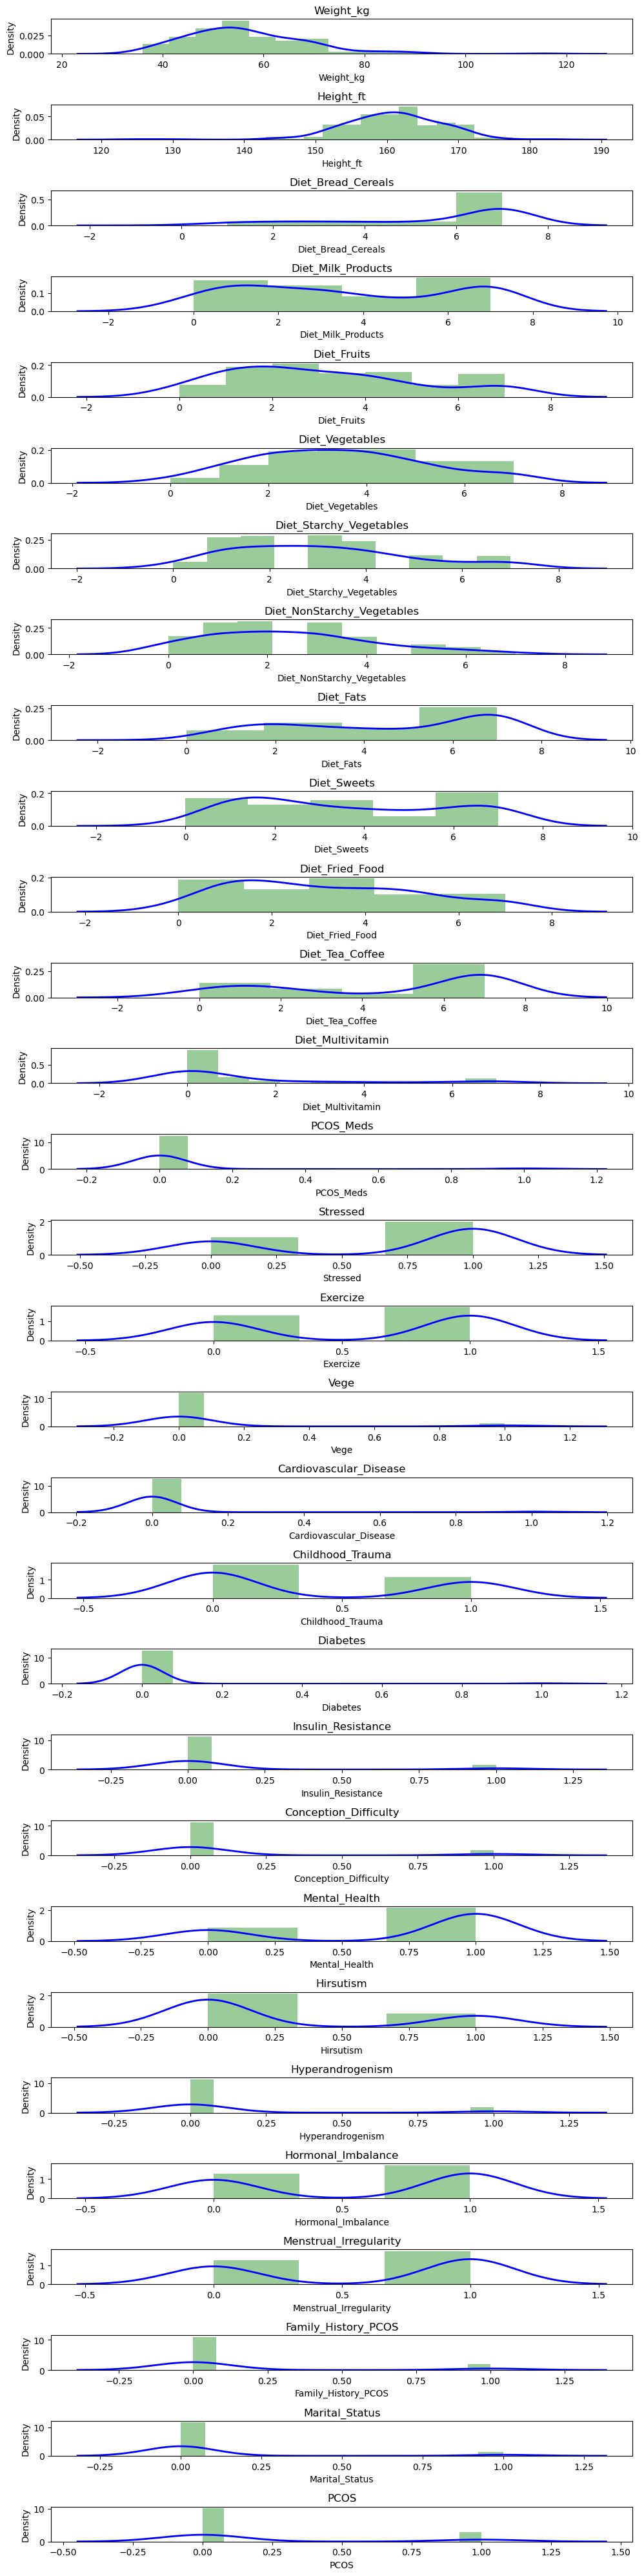

In [9]:
plt.figure(figsize = (10, 40))
for i in range(len(df.columns)):
    ax = plt.subplot(30, 1, i + 1)
    #--plot hist and kde in one plot; color, linewidth, label, 
    sns.distplot(df[df.columns[i]], kde_kws = {'color': 'b', 'lw': 2, 'label': 'KDE'}, hist_kws={'color': 'g'})
    plt.title(df.columns[i])

plt.tight_layout()

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [11]:
df_scaled.shape

(173, 30)

In [12]:
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    score_1.append(kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

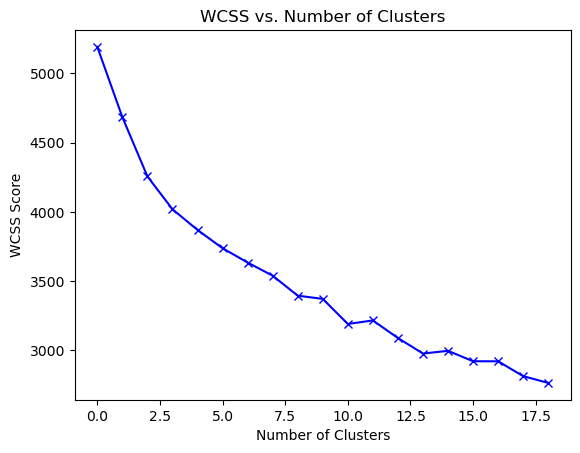

In [13]:
plt.plot(score_1, 'bx-')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

labels = kmeans.fit_predict(df_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
labels

array([2, 2, 4, 4, 1, 4, 4, 2, 0, 4, 2, 4, 5, 0, 1, 0, 2, 1, 4, 2, 4, 0,
       1, 1, 4, 1, 4, 1, 1, 2, 1, 4, 2, 4, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 4, 2, 4, 1, 4, 4, 2, 1, 1, 1, 0, 4, 2, 4, 2, 0, 4, 2, 4, 2, 5,
       0, 2, 2, 1, 2, 2, 4, 1, 4, 1, 0, 1, 0, 0, 4, 4, 2, 1, 2, 2, 4, 2,
       2, 2, 2, 0, 2, 2, 2, 5, 1, 4, 1, 4, 1, 0, 0, 1, 3, 1, 4, 2, 1, 1,
       4, 2, 0, 2, 4, 5, 4, 2, 1, 4, 1, 3, 1, 0, 2, 4, 4, 0, 4, 2, 0, 4,
       2, 1, 1, 2, 4, 4, 4, 1, 2, 1, 4, 4, 2, 2, 1, 2, 4, 2, 0, 2, 2, 4,
       4, 0, 4, 1, 0, 0, 1, 4, 2, 4, 0, 2, 5, 2, 1, 4, 0, 4, 2])

In [27]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)

In [28]:
df_cluster.head()

,Weight_kg,Height_ft,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,...,Conception_Difficulty,Mental_Health,Hirsutism,Hyperandrogenism,Hormonal_Imbalance,Menstrual_Irregularity,Family_History_PCOS,Marital_Status,PCOS,cluster
0,66.0,157.48,7,7,2,2,3,1,7,3,...,0,1,0,0,0,1,0,0,0,2
1,56.0,165.10,4,4,4,4,4,2,4,0,...,0,0,0,0,0,0,0,0,0,2
2,89.0,167.64,6,2,1,3,2,1,7,1,...,0,1,1,0,0,0,1,0,0,4
3,55.0,160.02,2,3,1,2,5,3,5,5,...,1,1,1,0,1,0,1,0,0,4
4,55.0,160.02,4,7,2,3,4,4,6,2,...,0,1,0,0,0,0,0,0,0,1


C:\Users\RMeehan\AppData\Local\Temp\ipykernel_3856\608632485.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (35, 5))


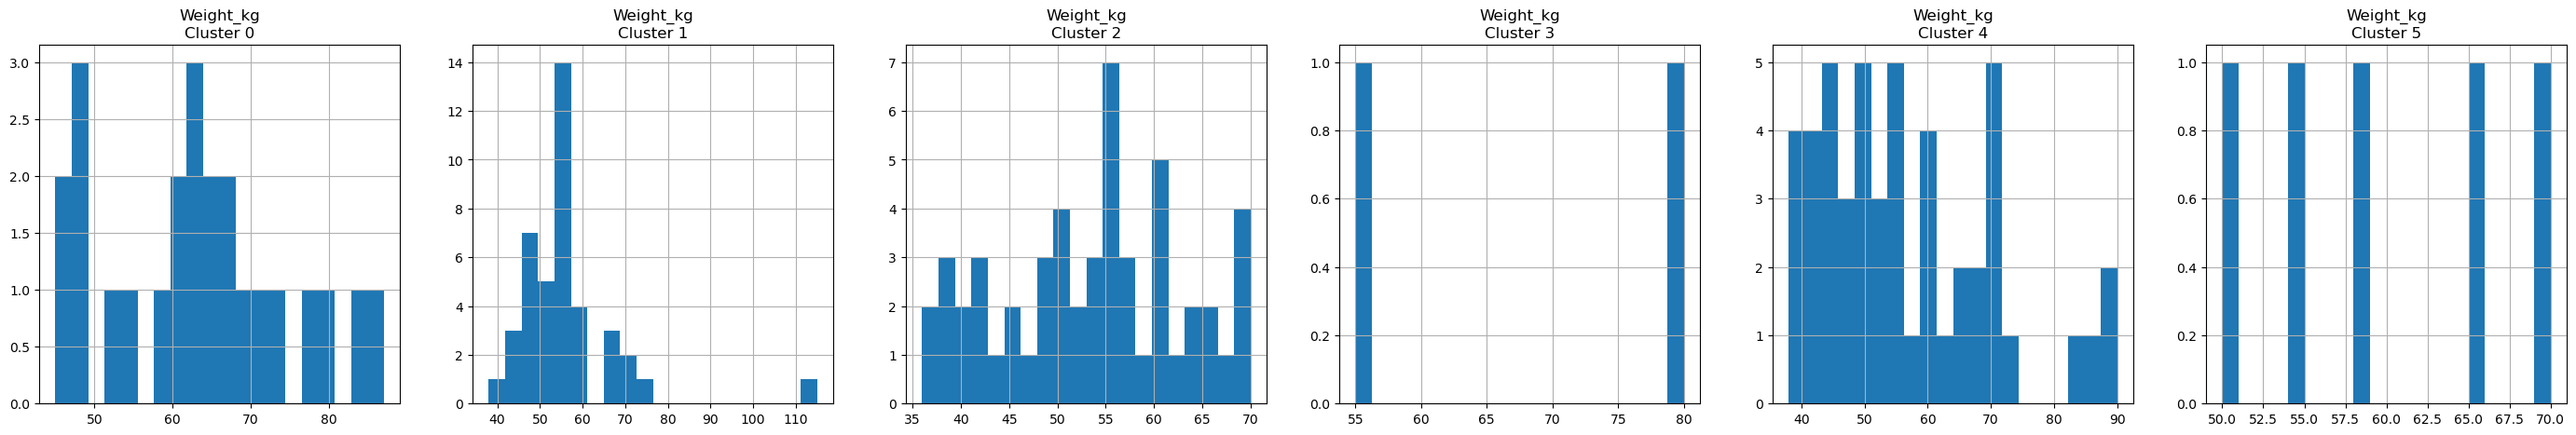

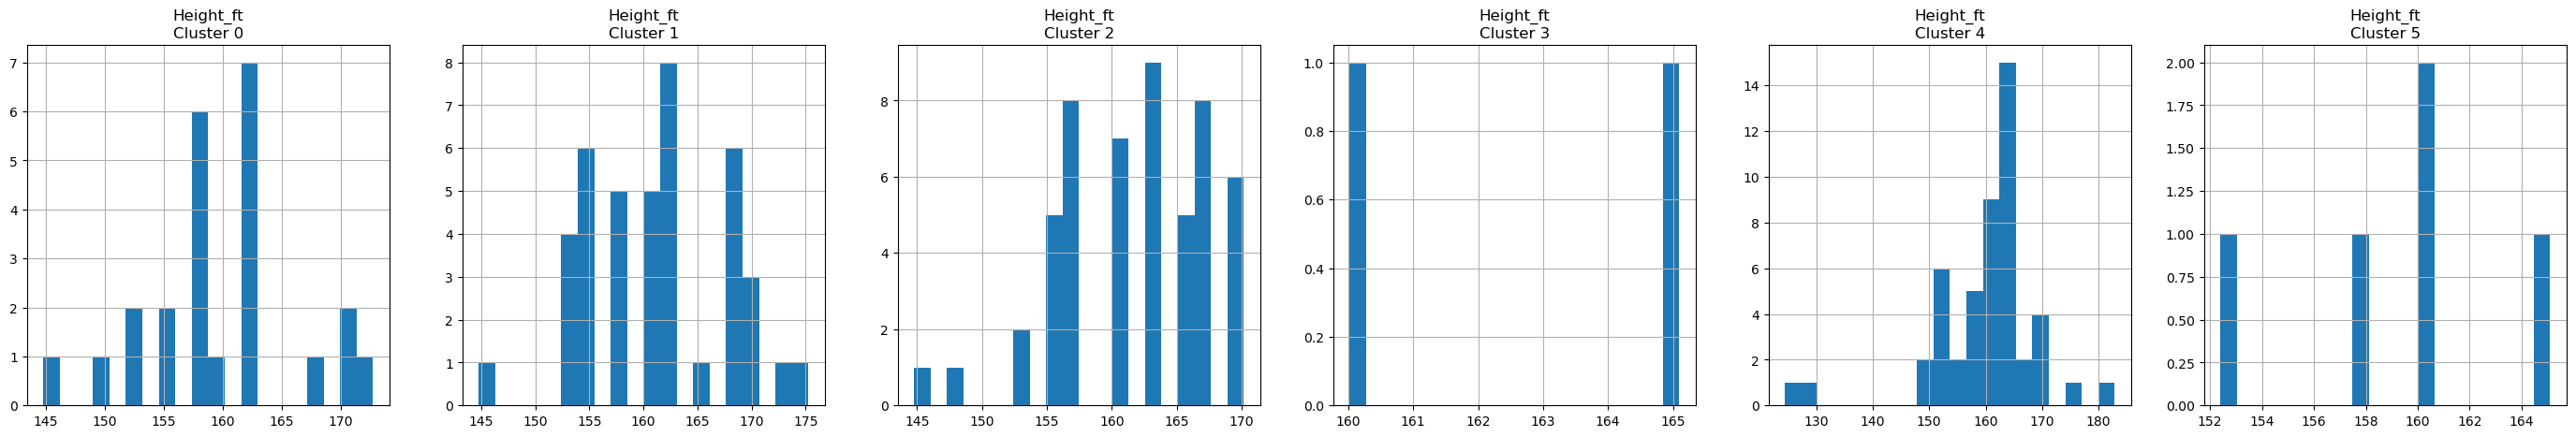

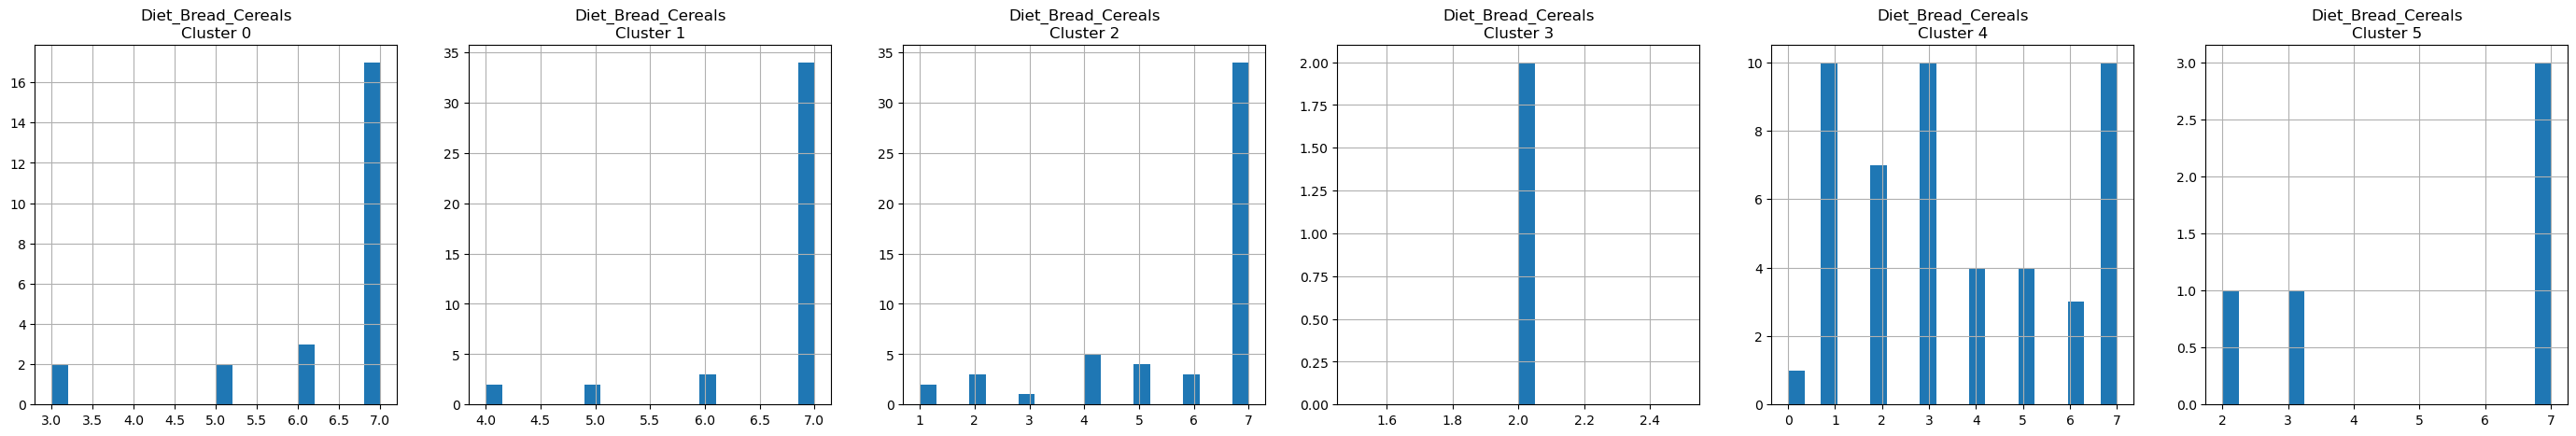

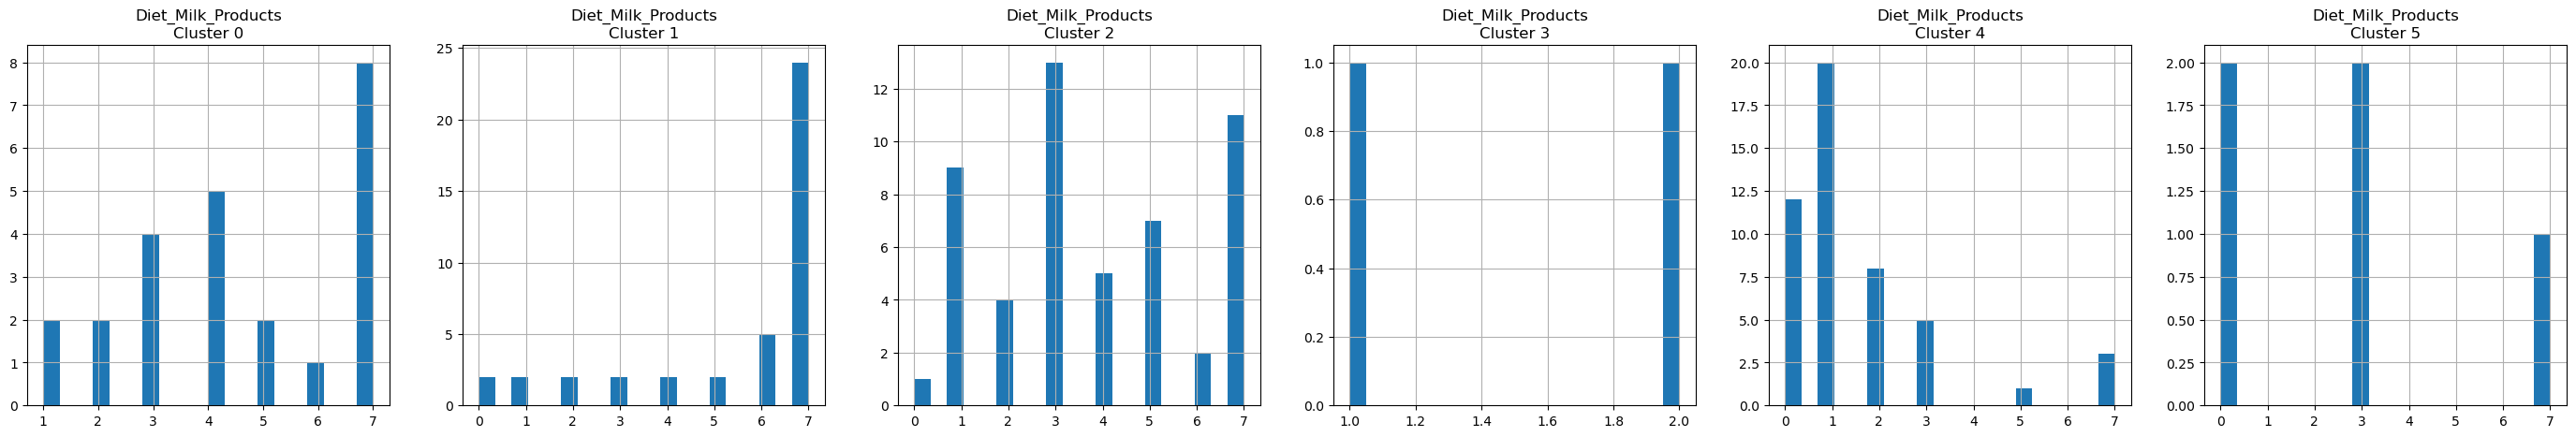

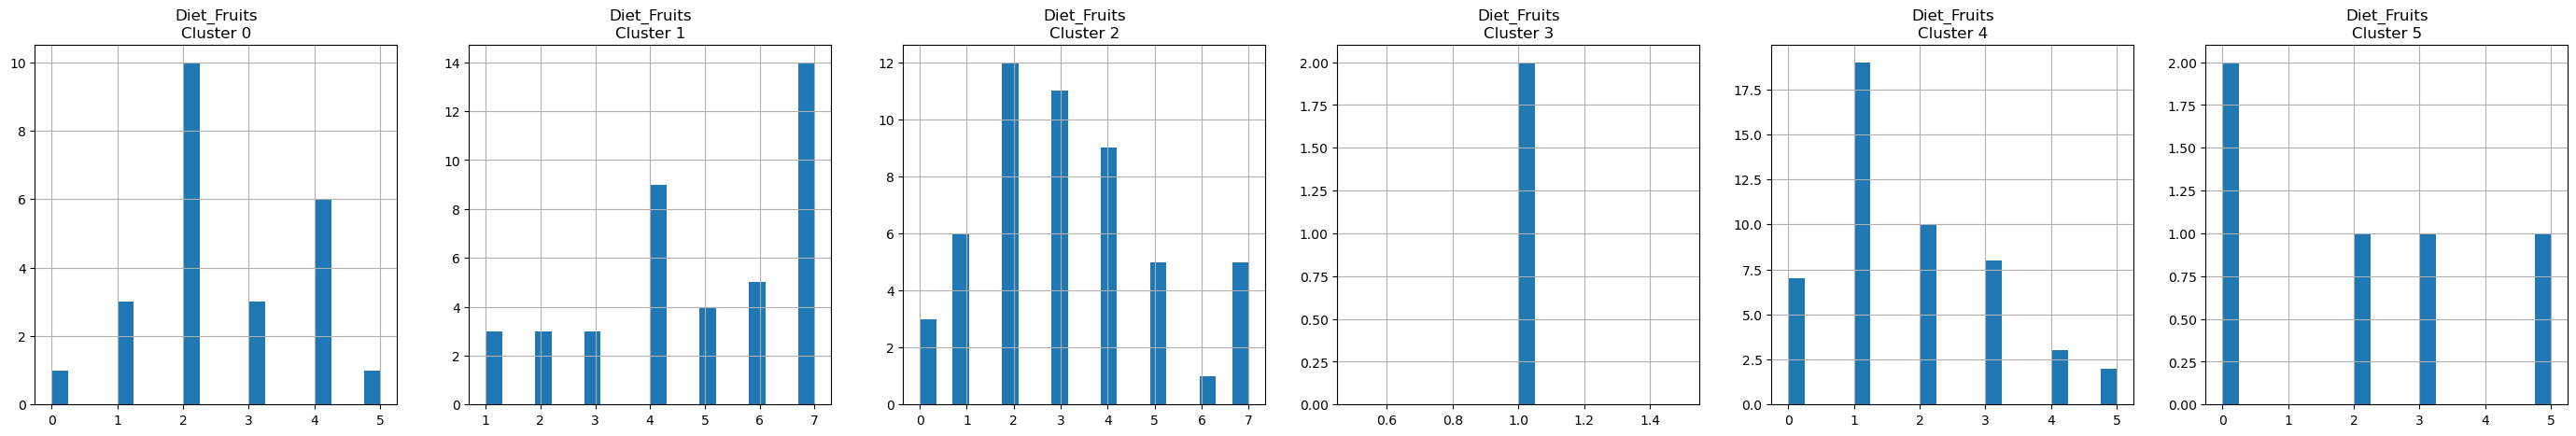

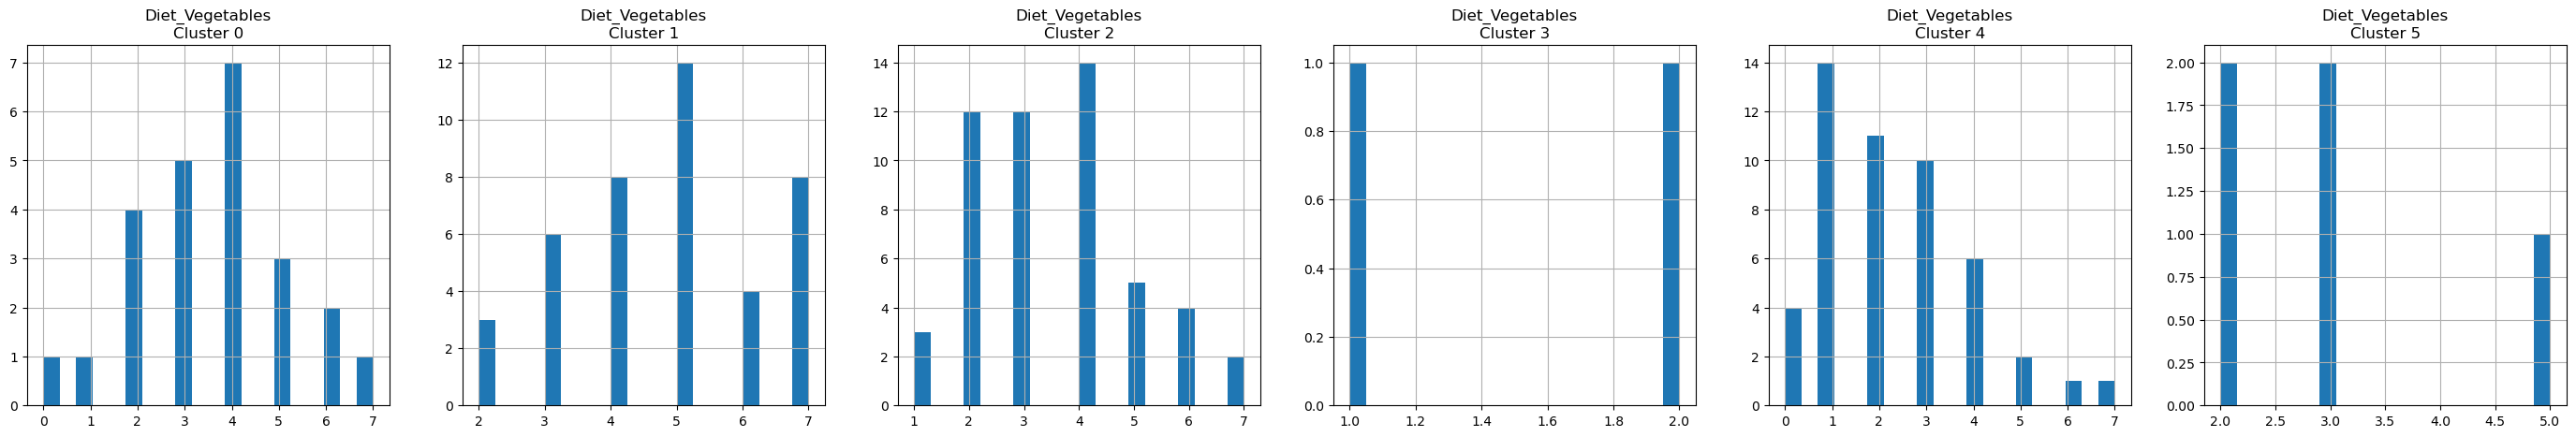

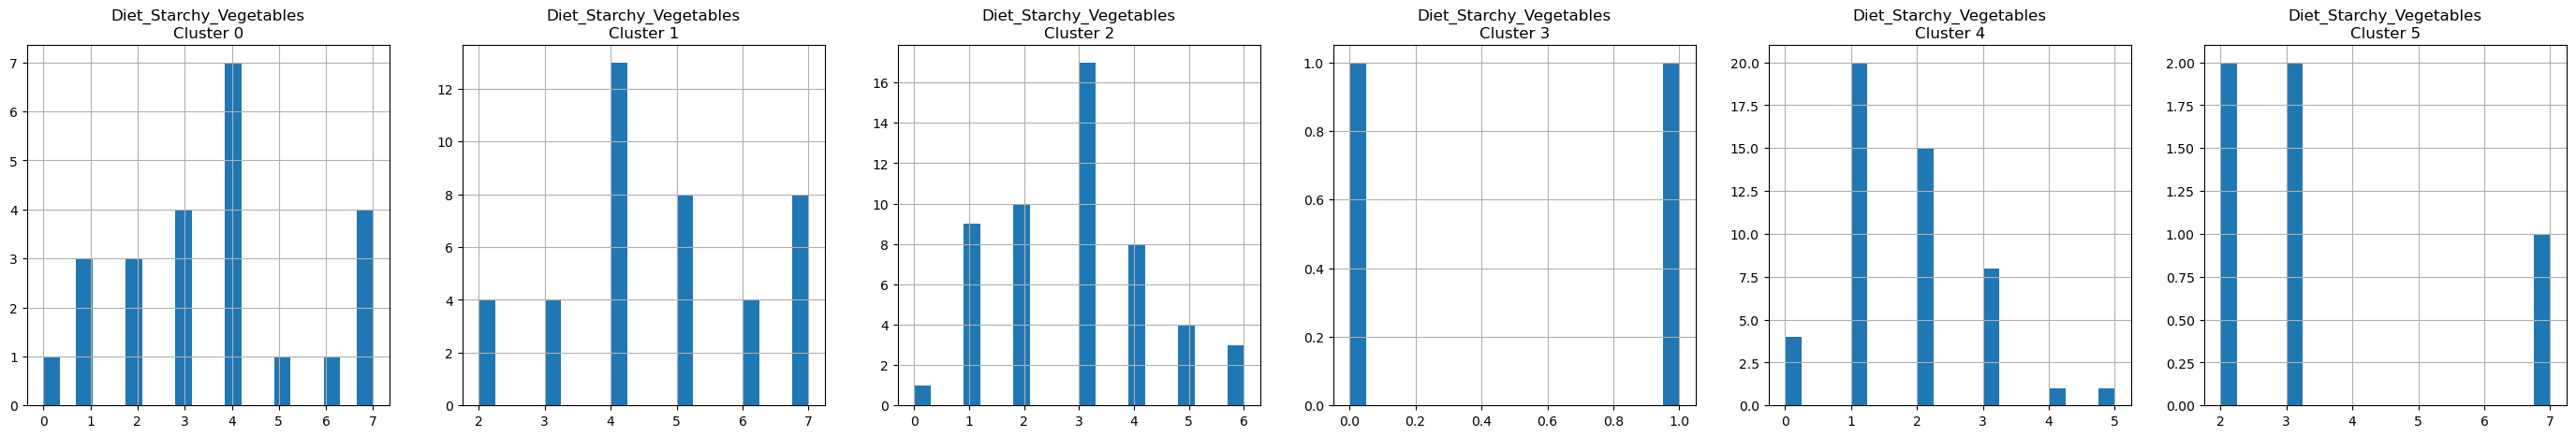

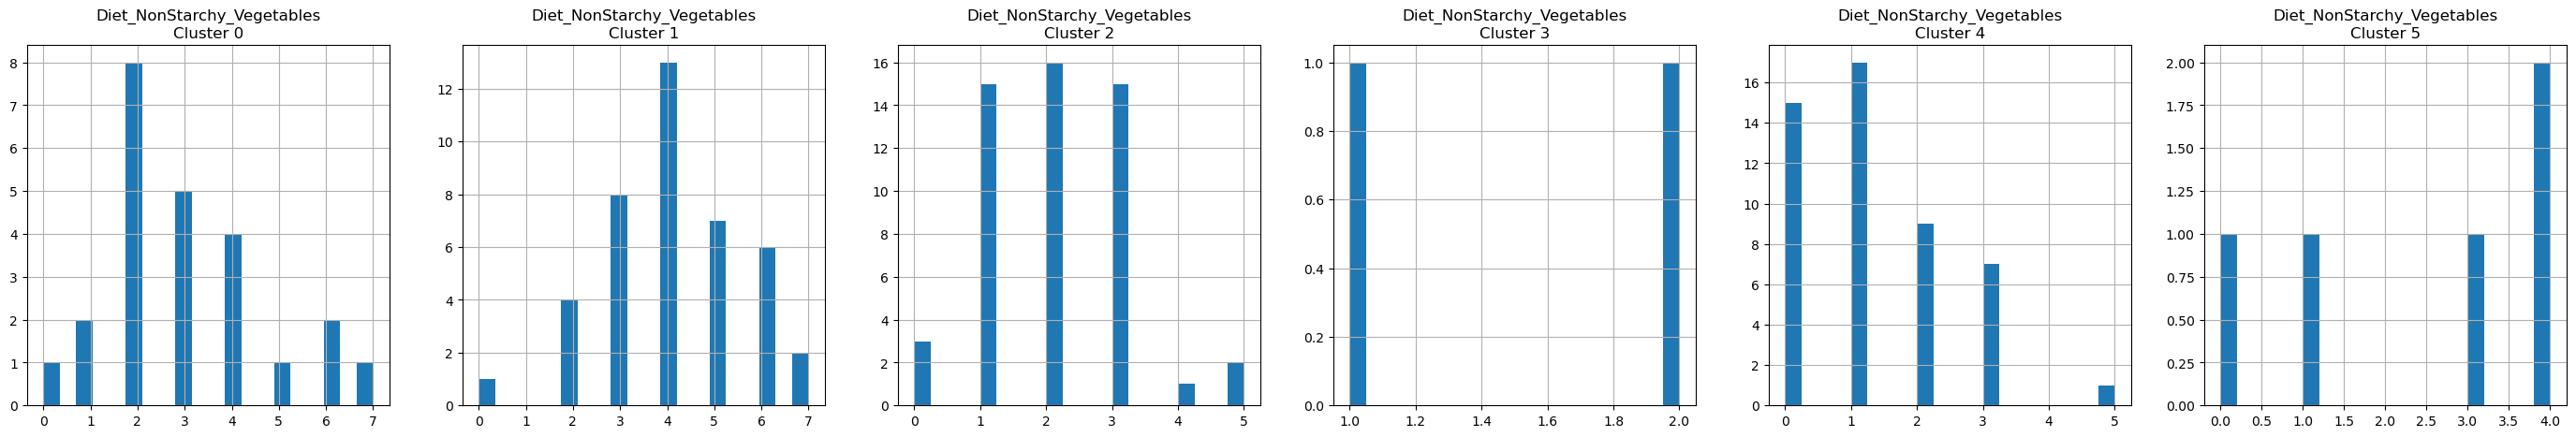

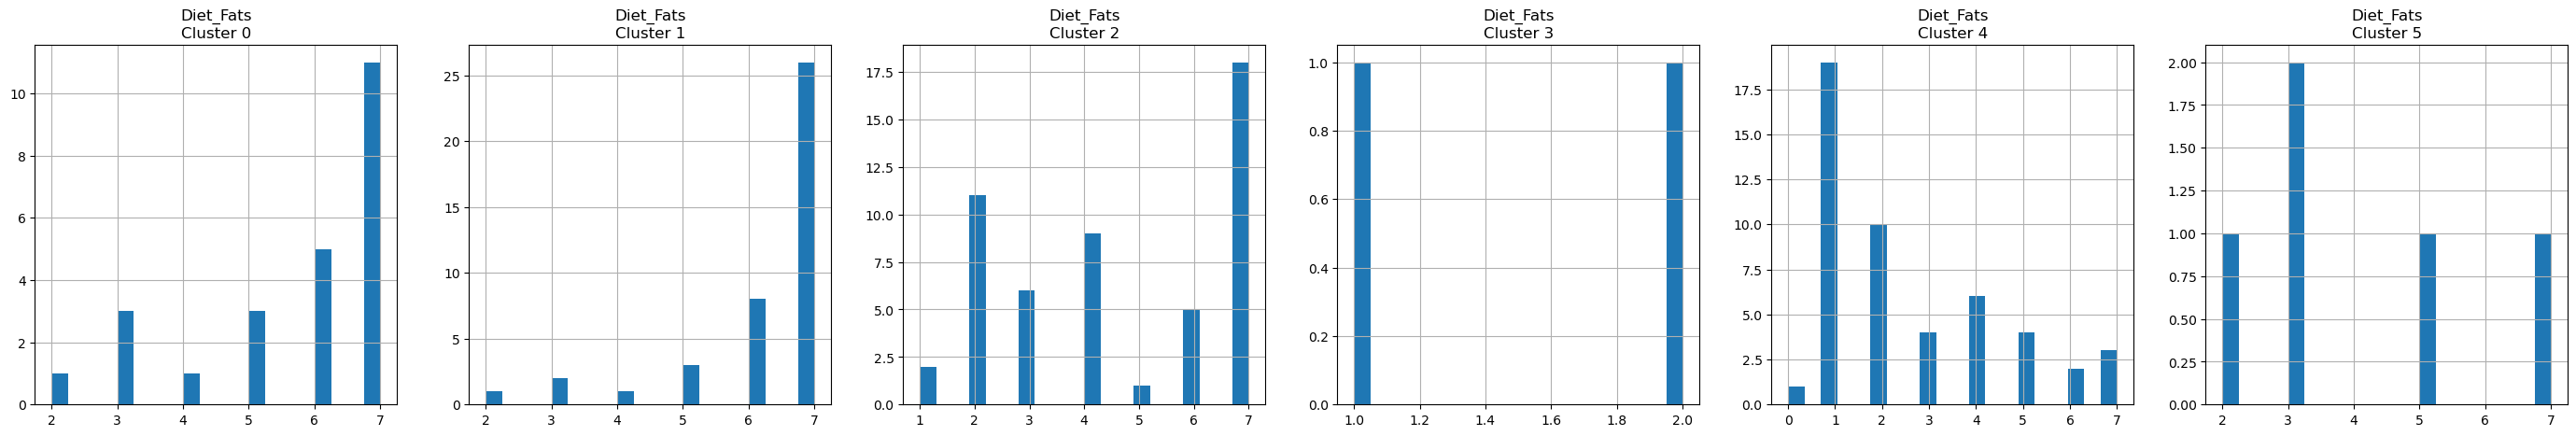

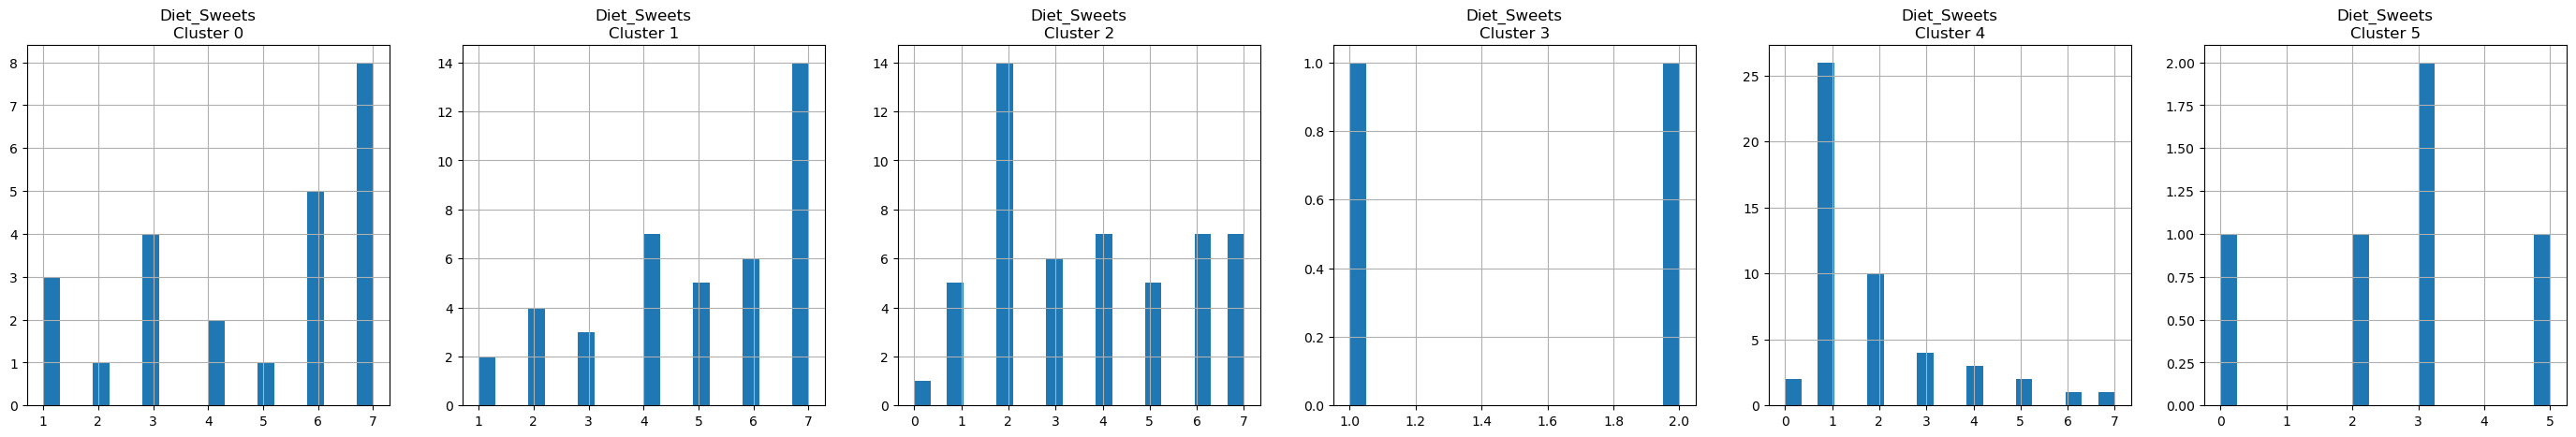

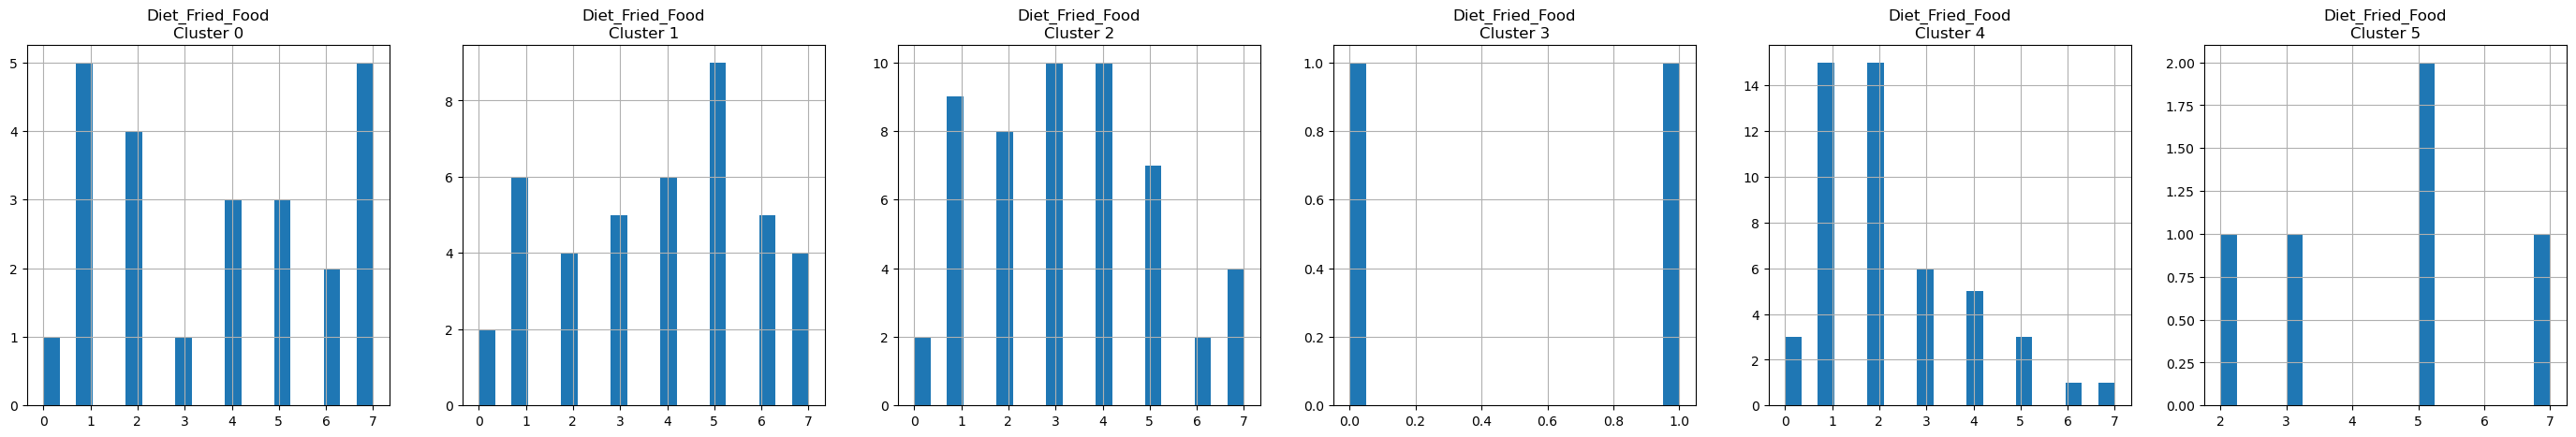

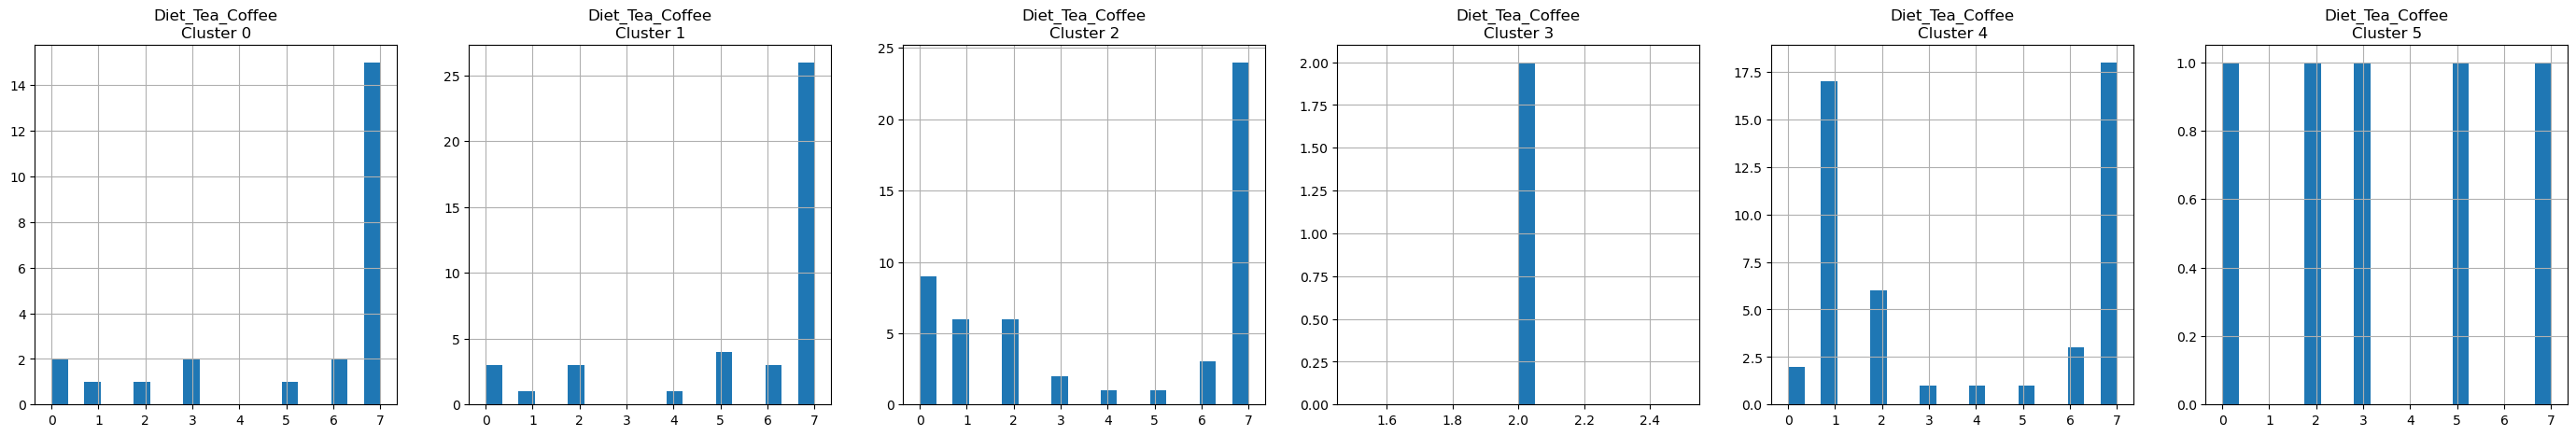

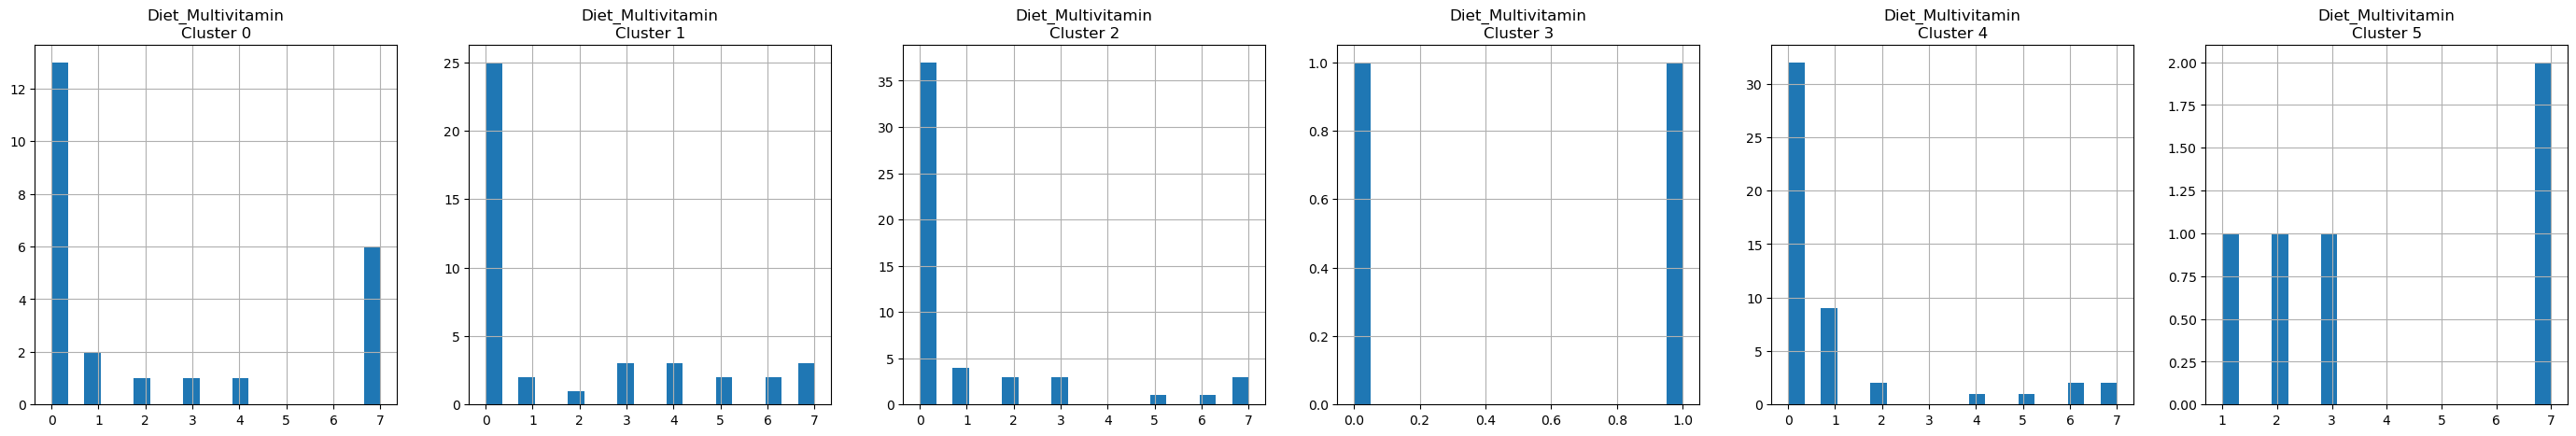

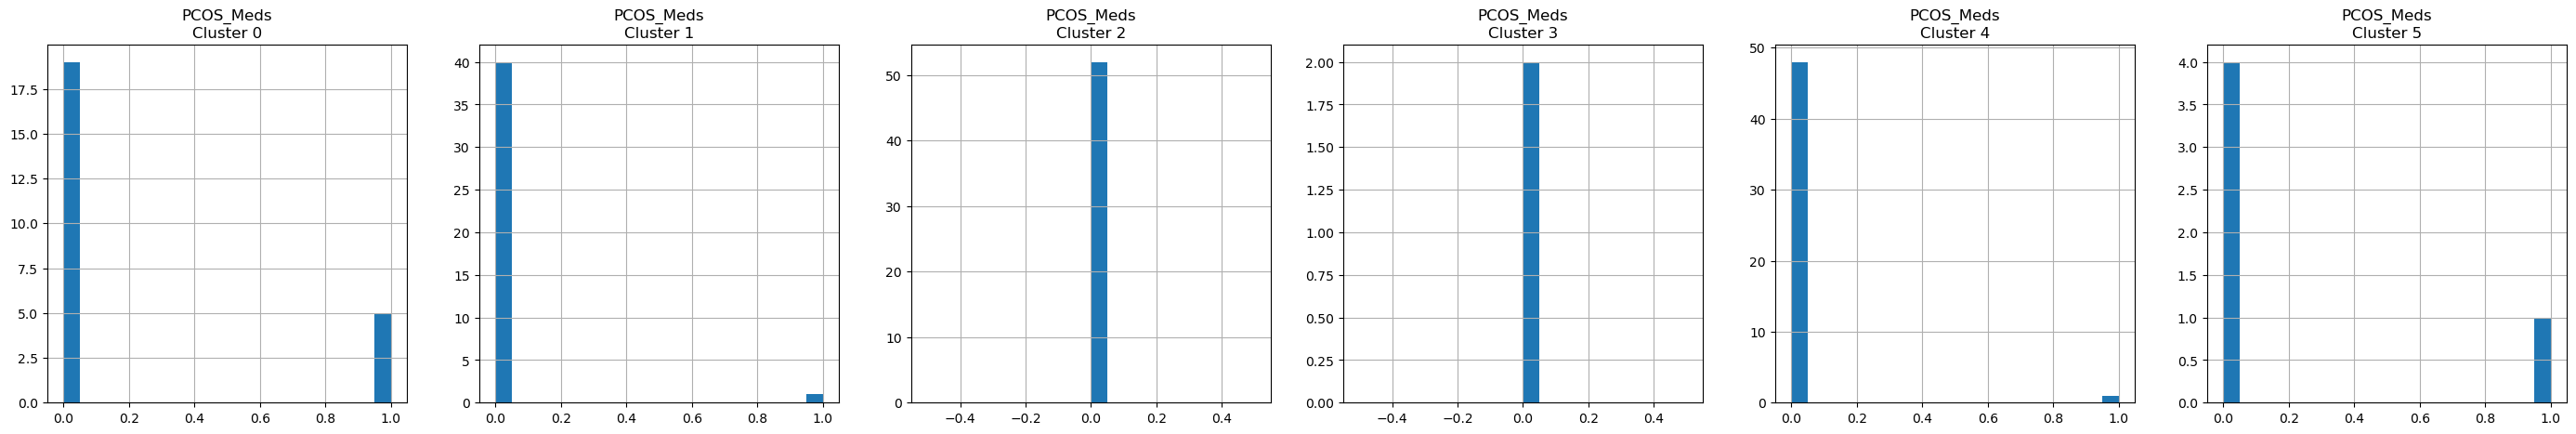

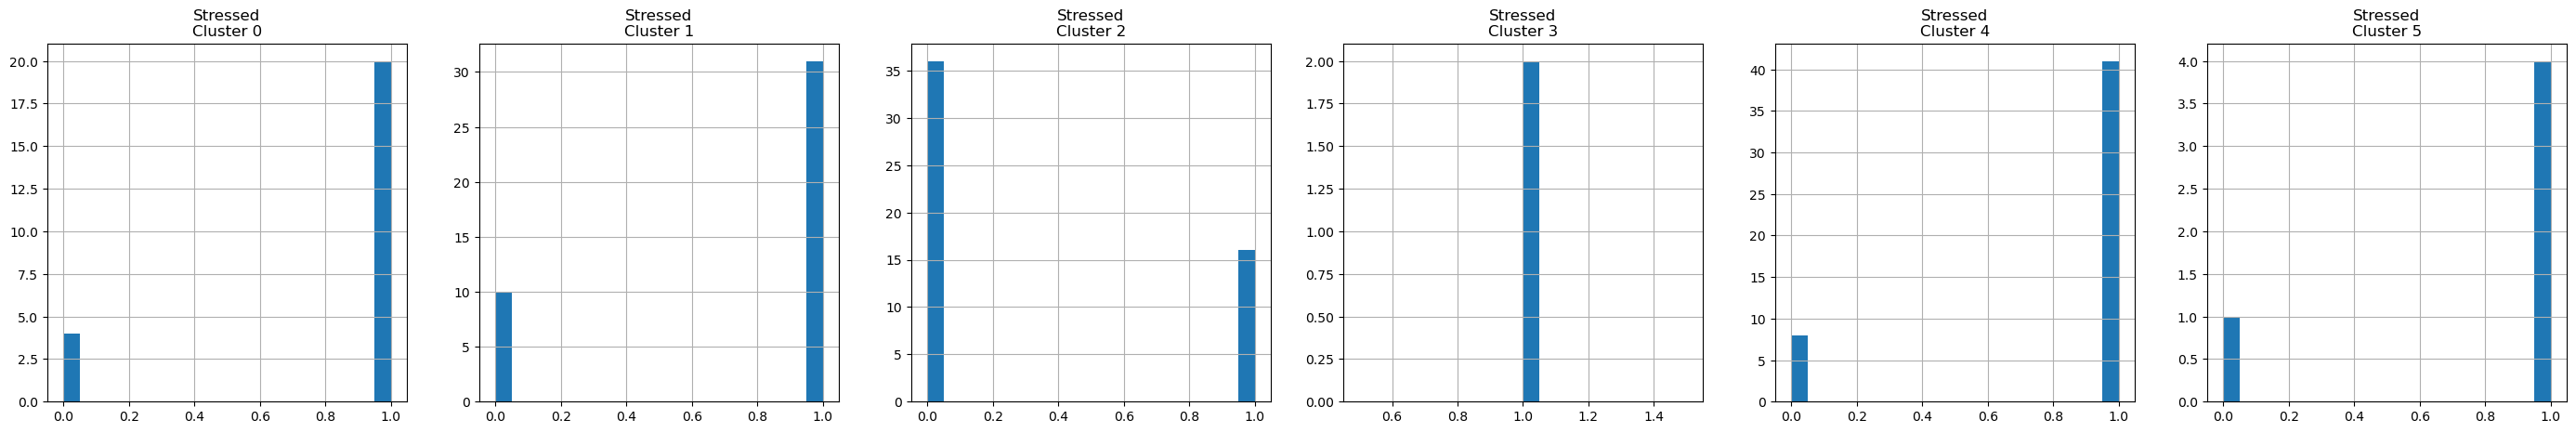

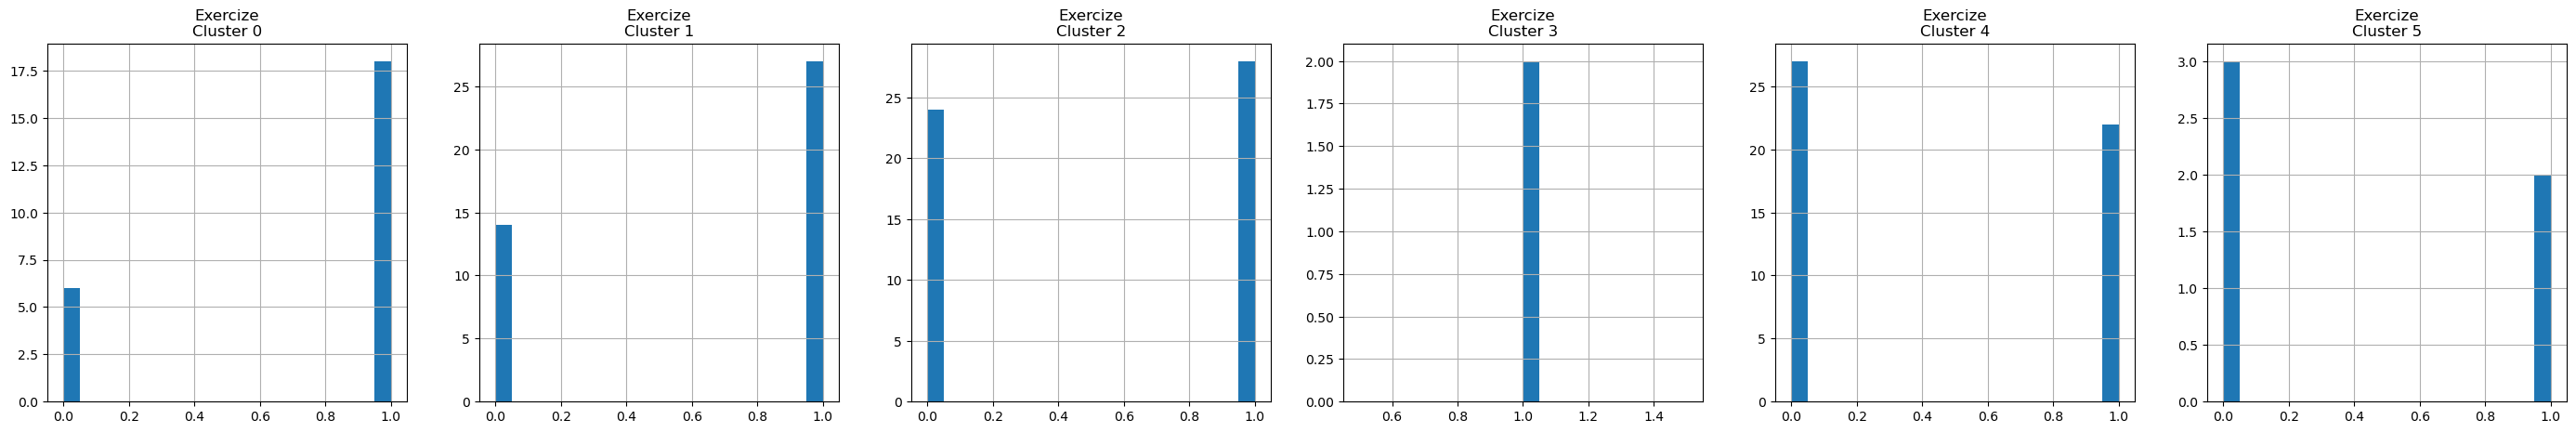

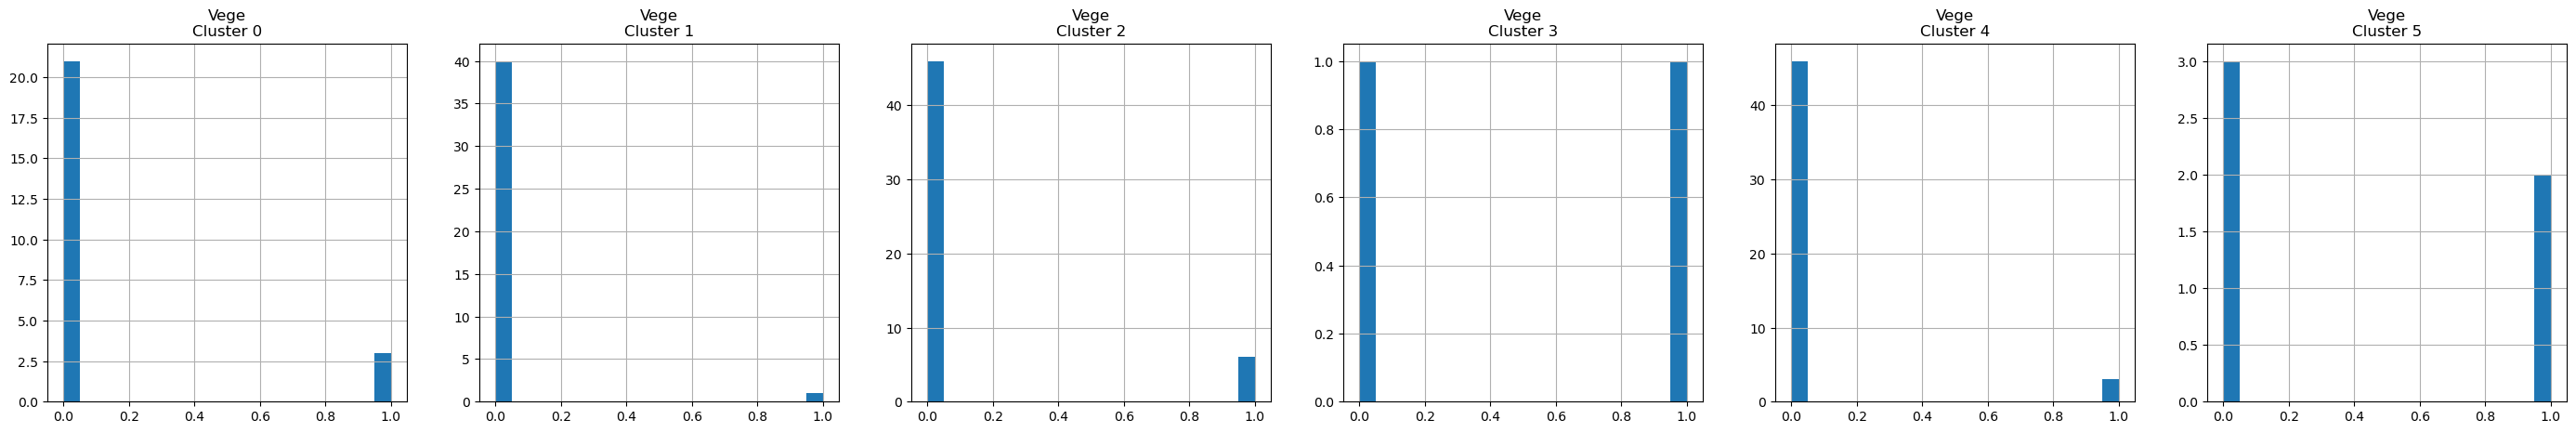

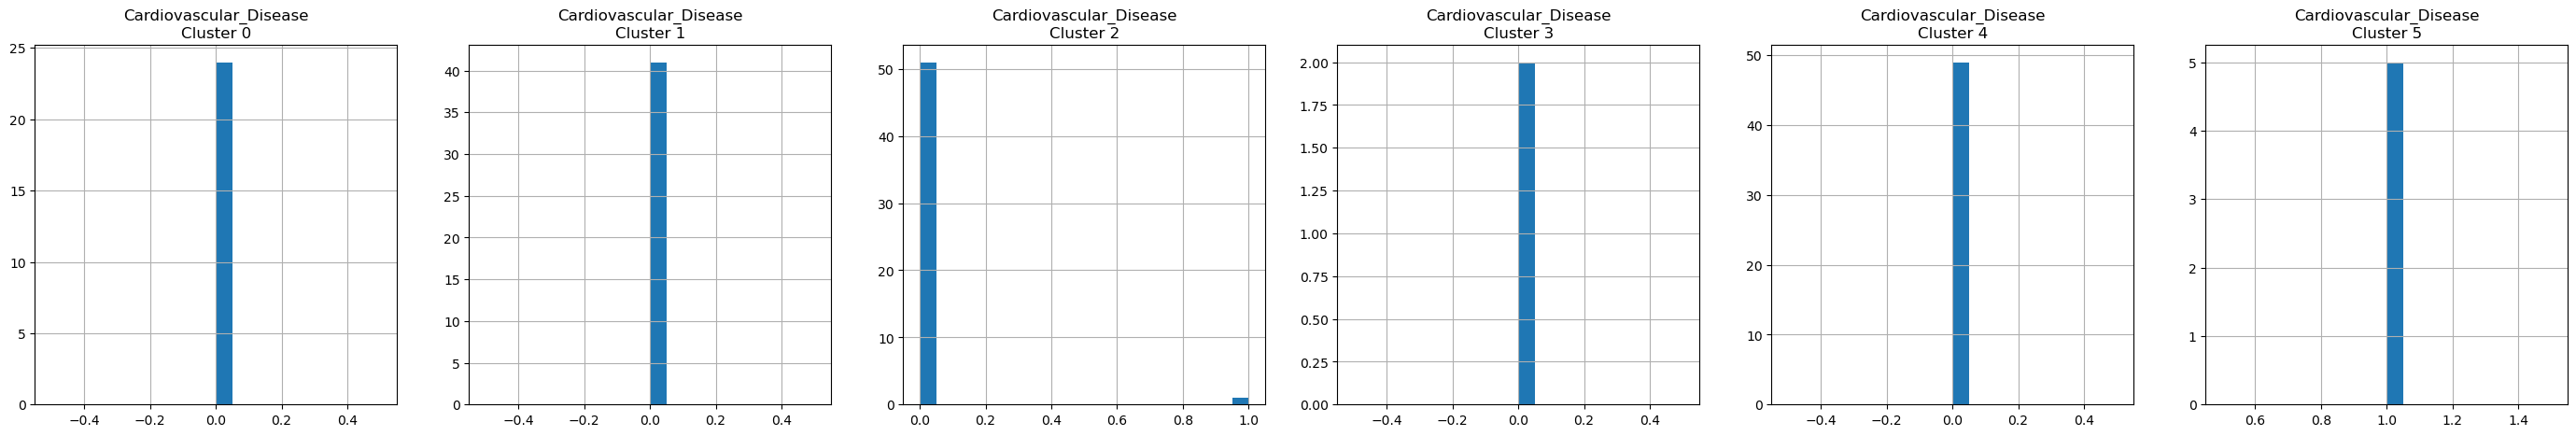

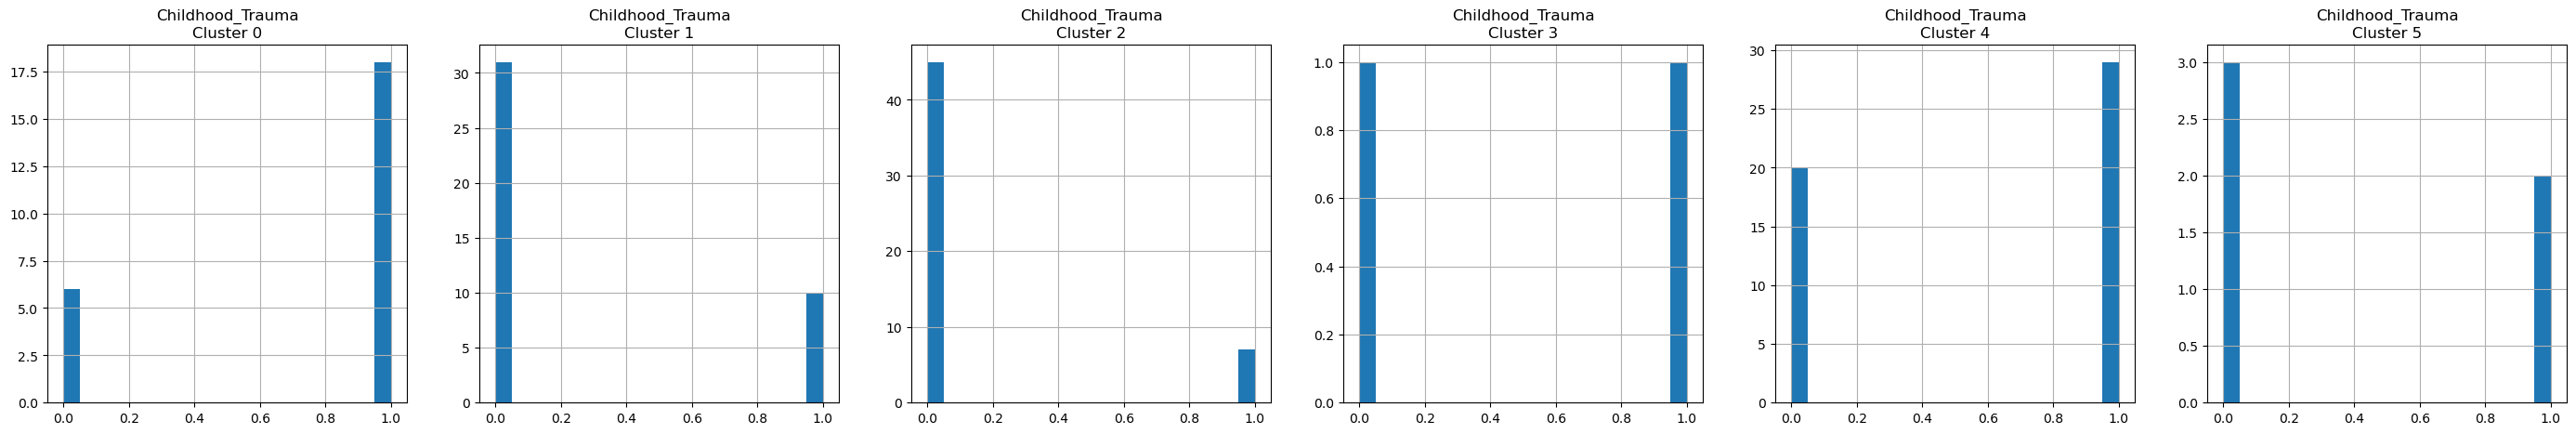

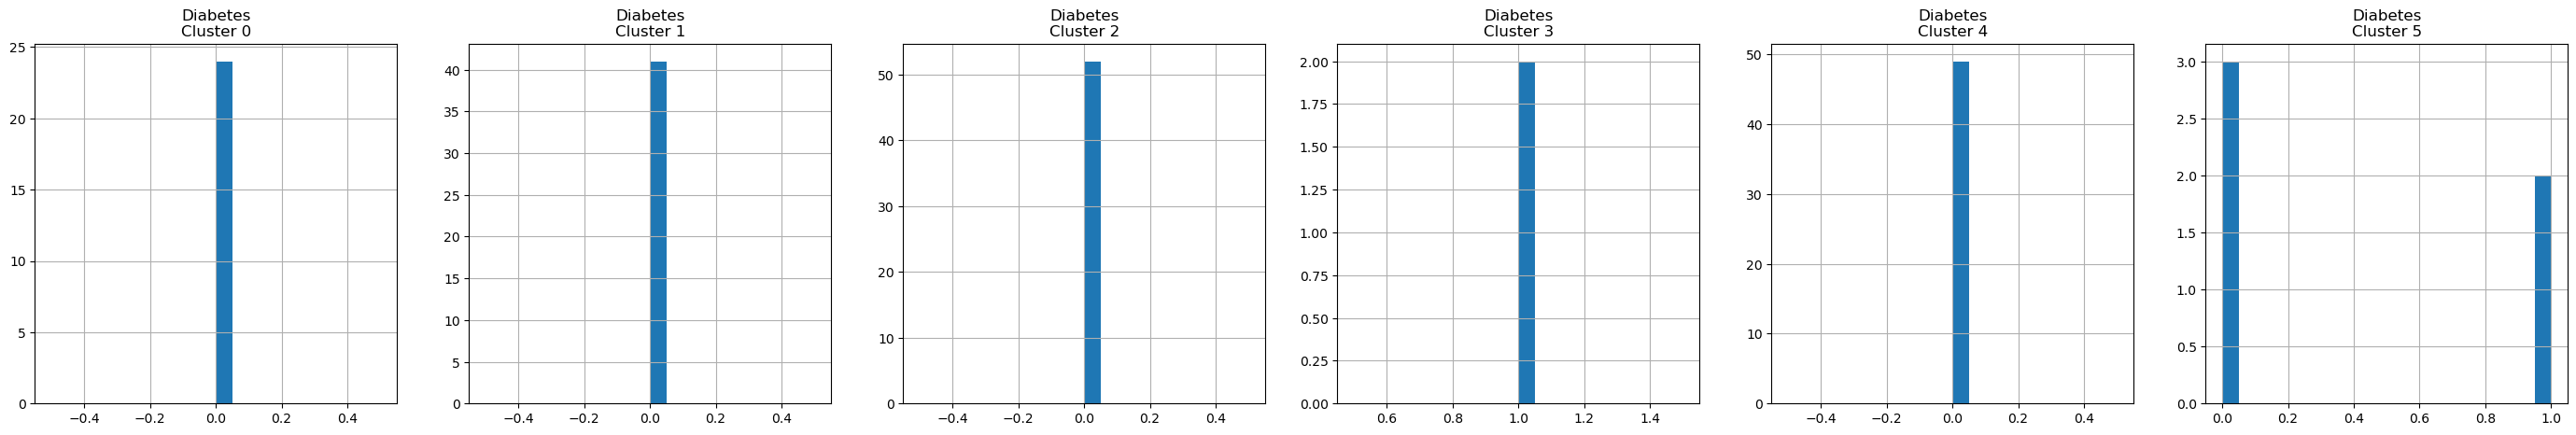

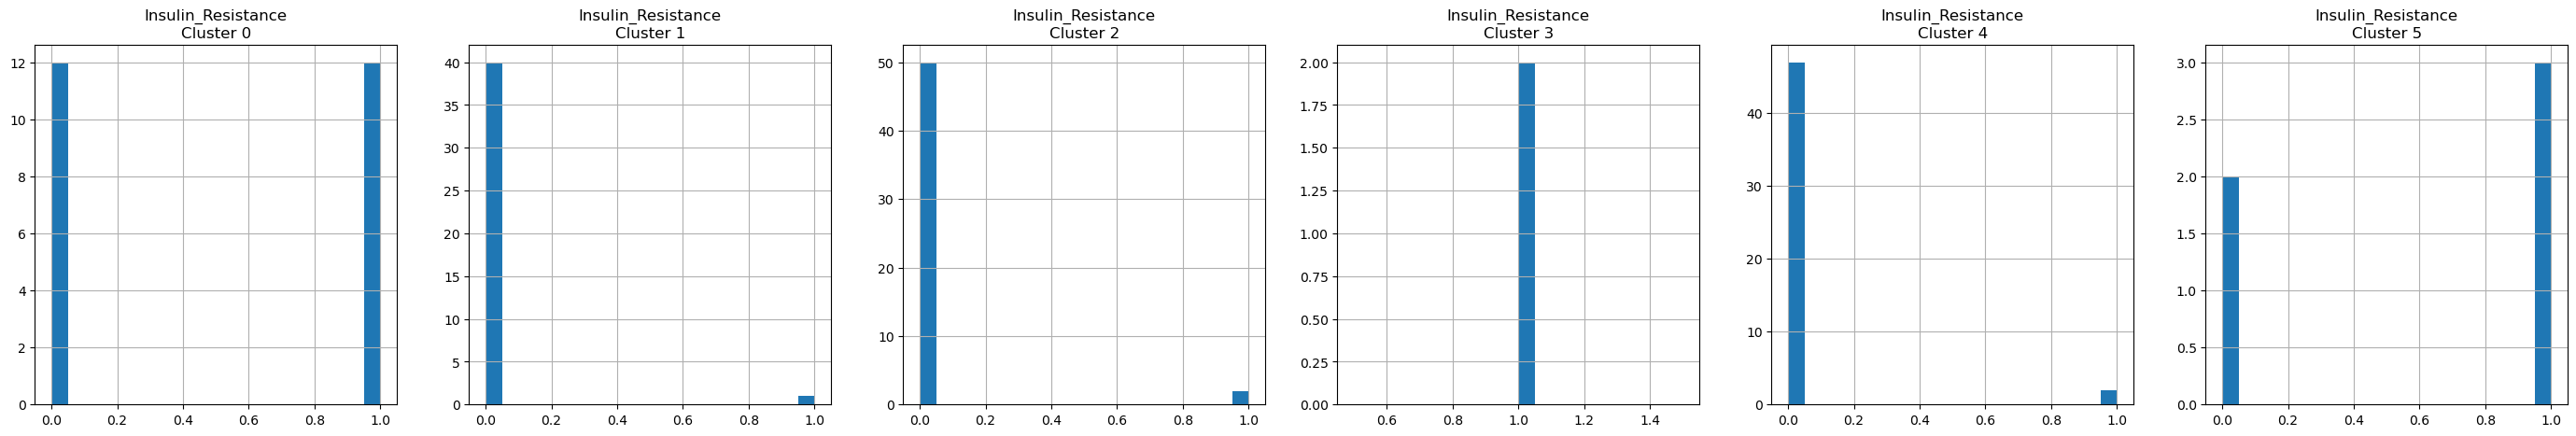

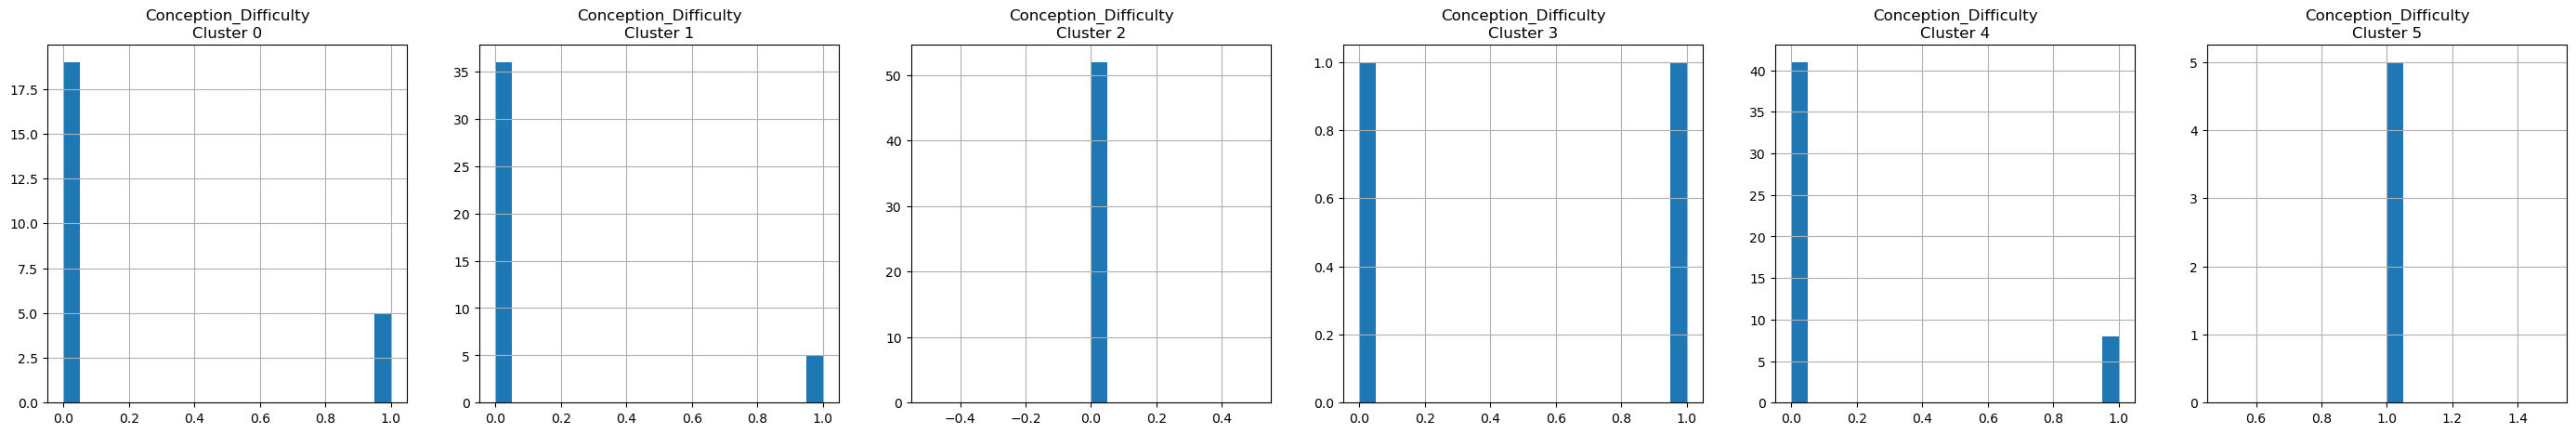

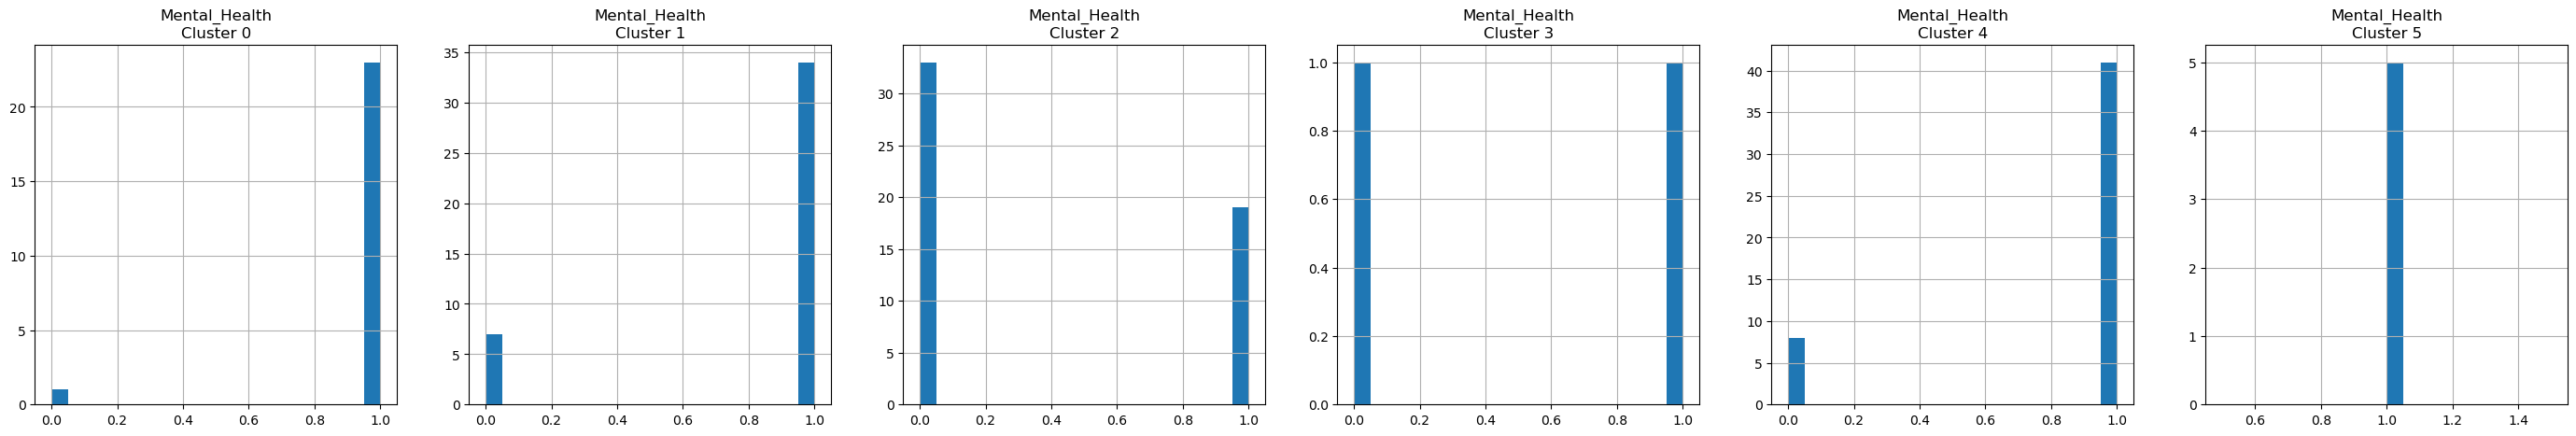

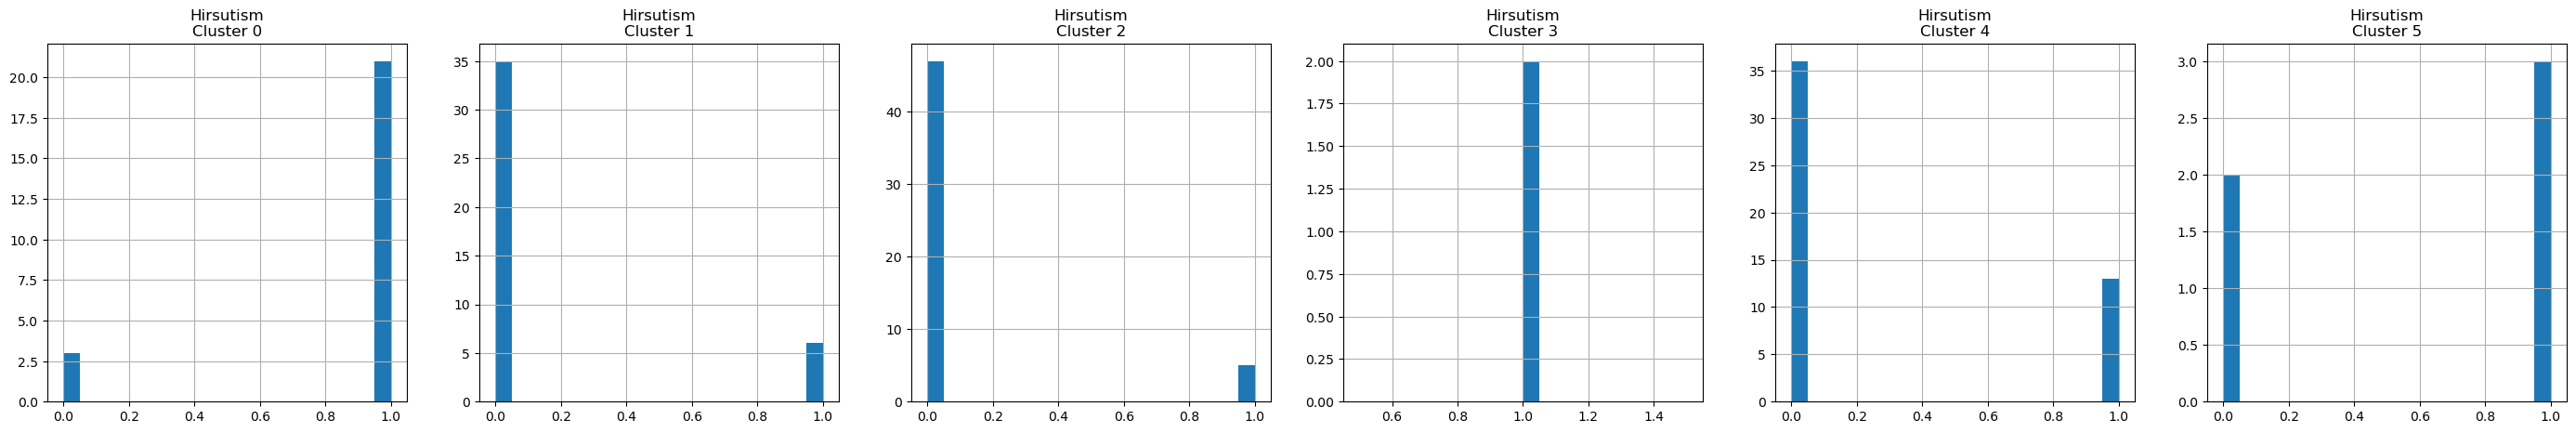

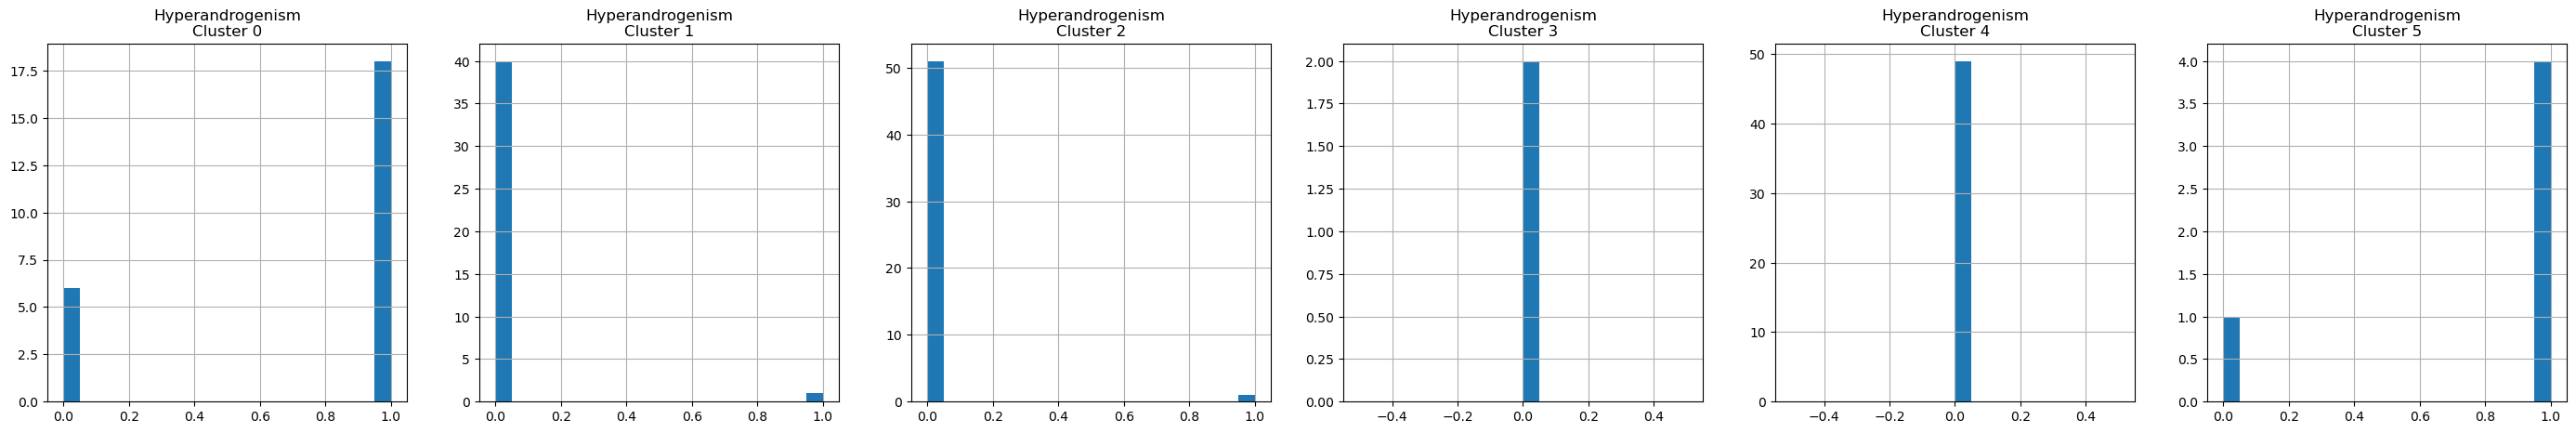

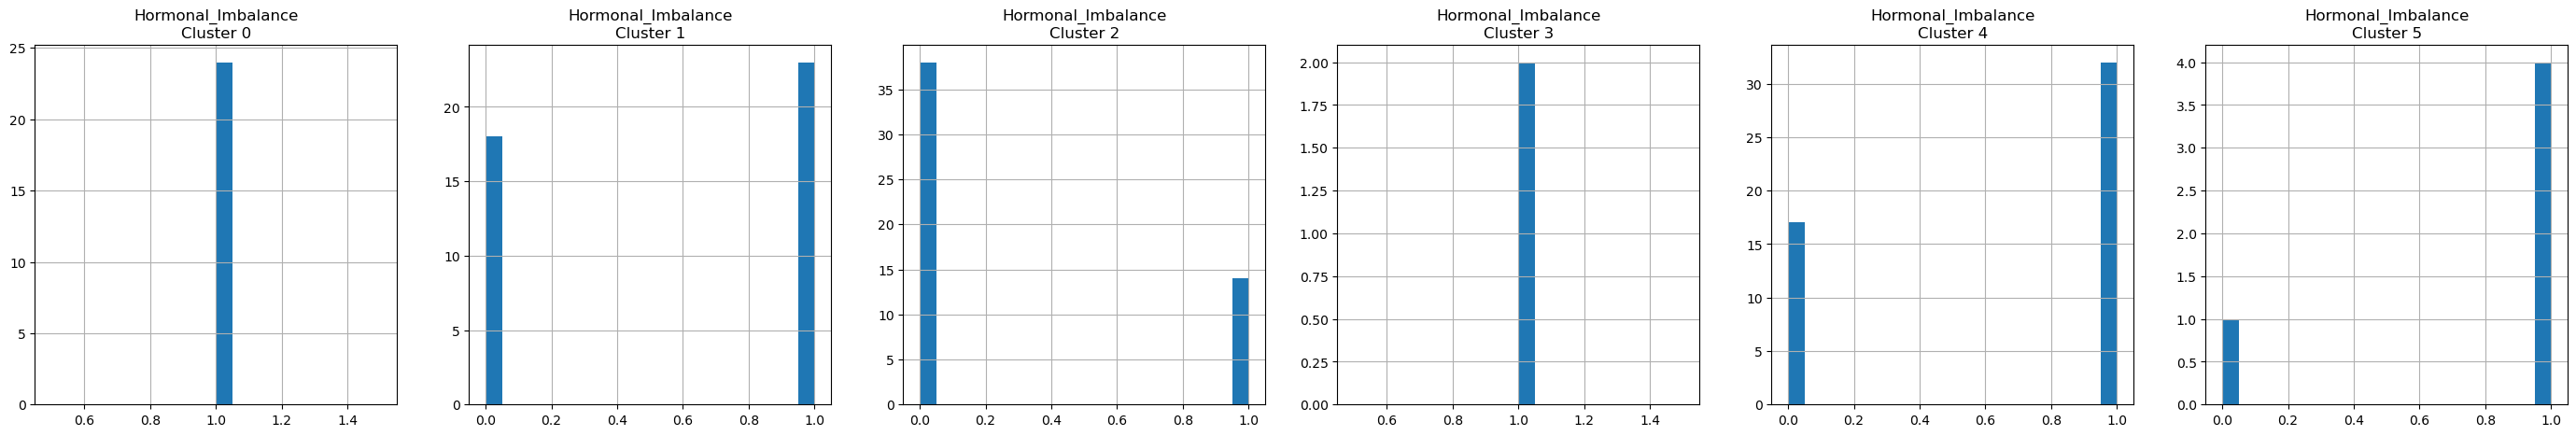

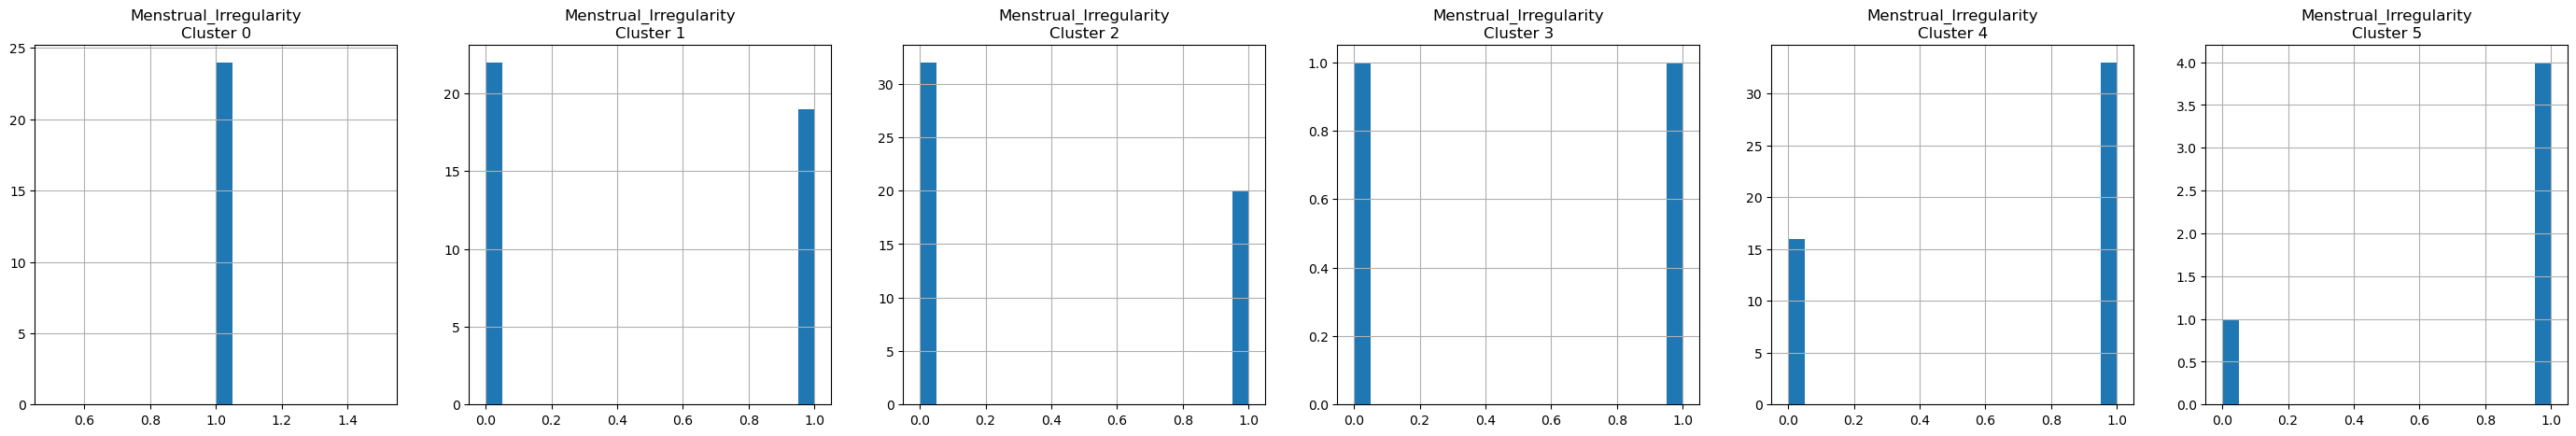

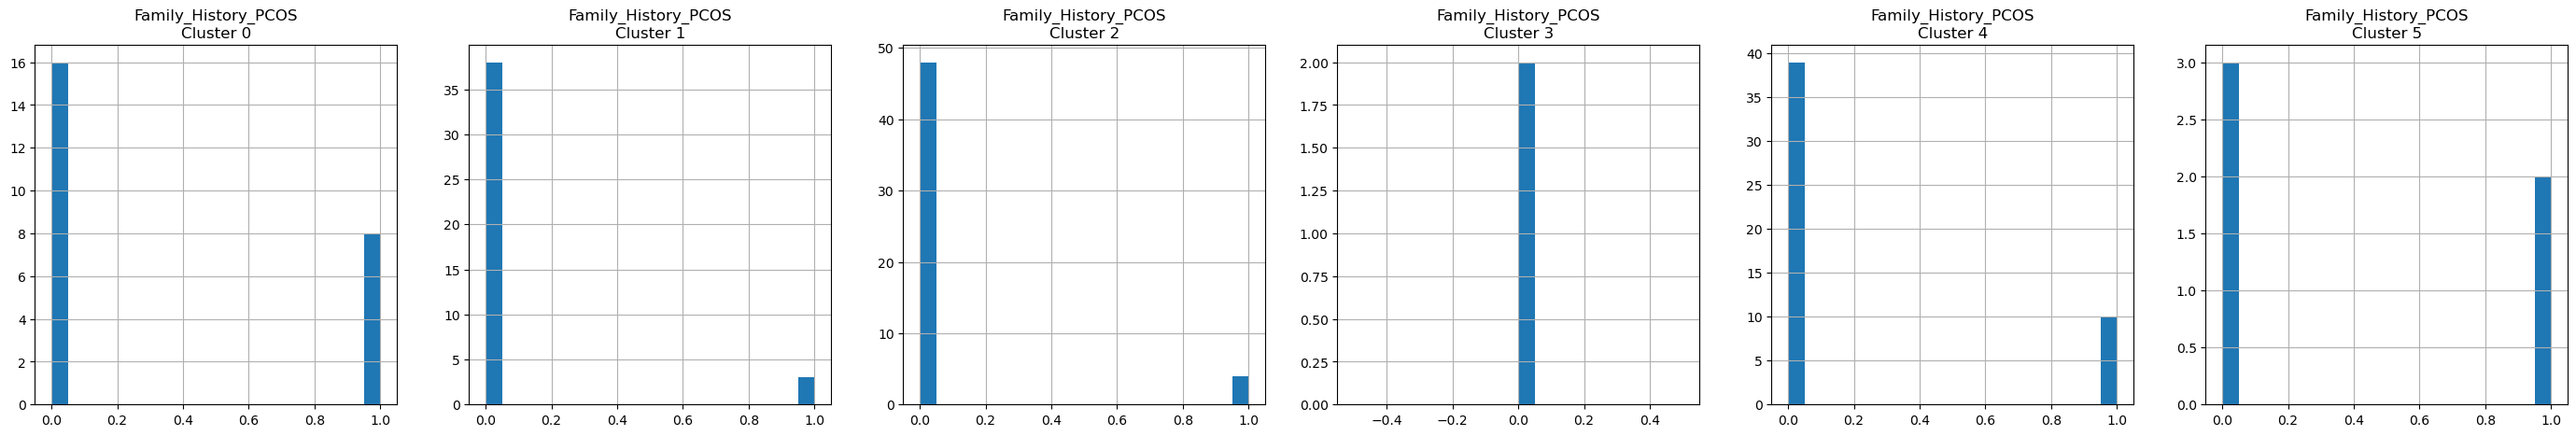

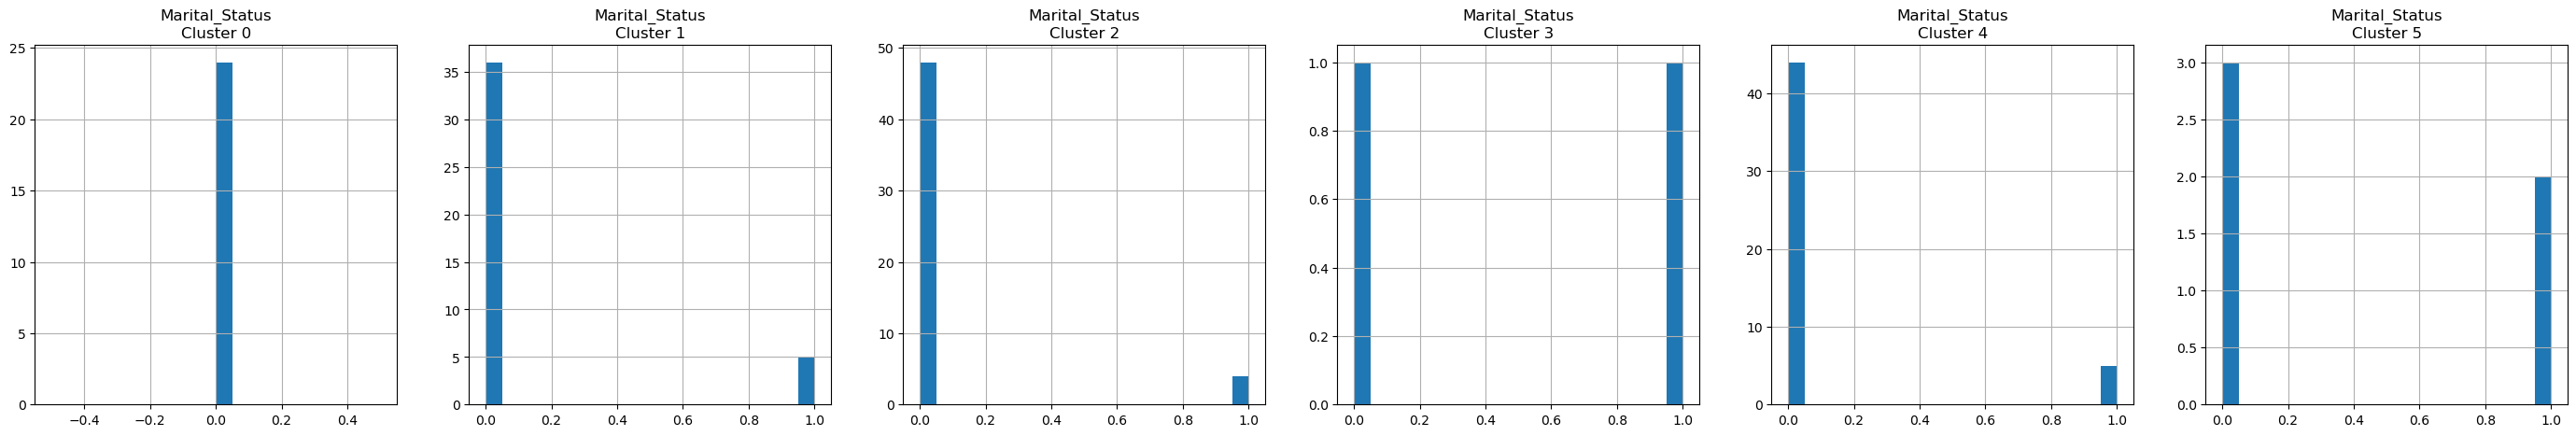

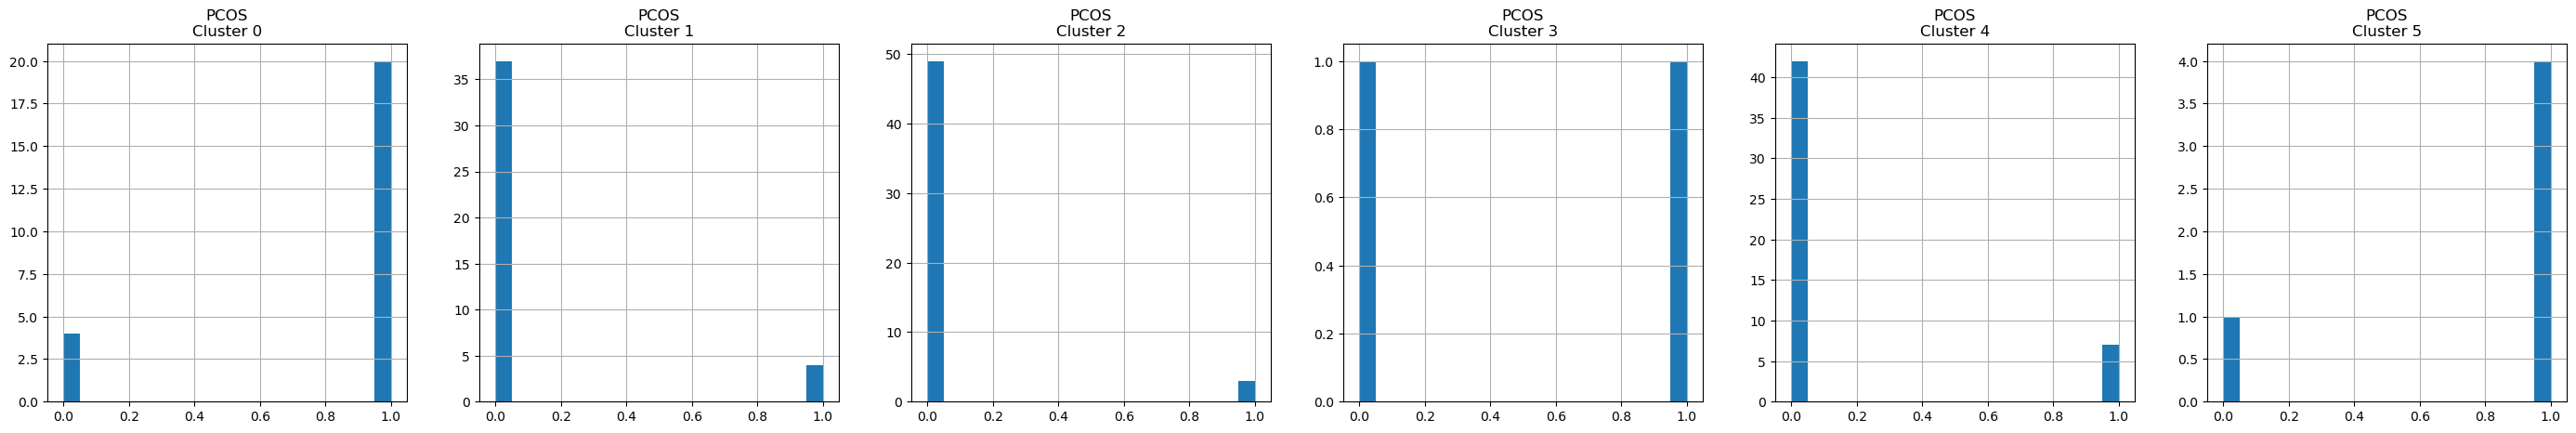

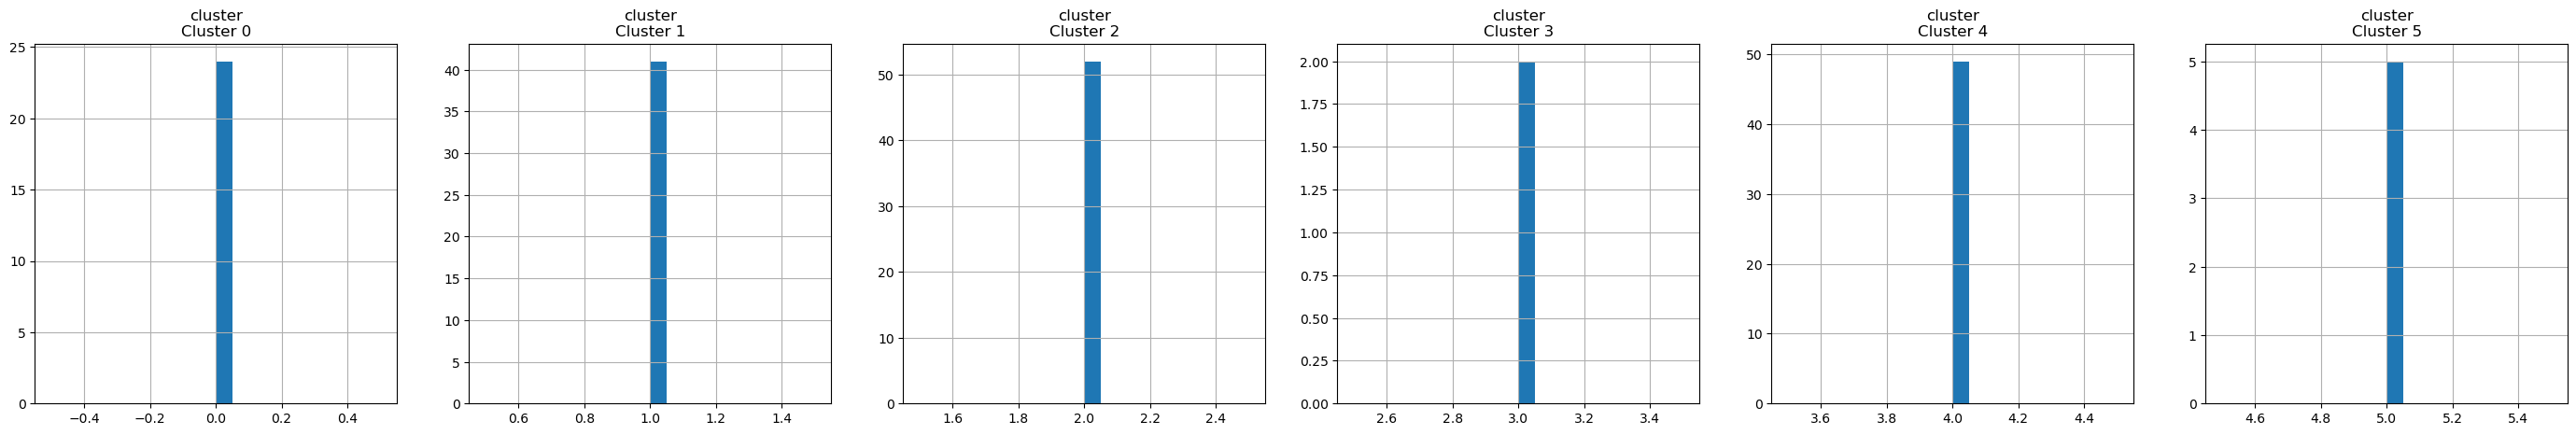

In [29]:
for i in df_cluster.columns:
    plt.figure(figsize = (35, 5))
    for j in range(6):
        plt.subplot(1, 6, j+1)
        cluster = df_cluster[ df_cluster['cluster'] == j ]
        cluster[i].hist(bins  = 20)
        plt.title( '{}\nCluster {}'.format(i, j))
plt.show()

In [30]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[ 0.29367325, -1.32463854],
       [-1.25970186, -2.61879826],
       [-0.88731773,  0.70686276],
       [-0.11590077,  1.71565594],
       [ 0.35156072, -0.97827232],
       [ 0.10497317, -0.10939237],
       [-0.60934096,  0.53219368],
       [-0.77725069, -1.41571838],
       [ 1.74022712,  4.53978568],
       [-4.53321367,  1.91338986],
       [-0.13850178, -2.01889515],
       [-2.48885068,  3.46510337],
       [-1.66250258,  1.99420693],
       [-1.85455452,  3.78604826],
       [ 2.04027357, -0.1101567 ],
       [ 1.59006148,  3.39883794],
       [ 0.83361025, -1.46021007],
       [ 3.85720675, -0.42210774],
       [-1.70668111,  1.30331369],
       [ 0.10401658, -0.48329437],
       [-0.97382185, -0.14364187],
       [ 2.37273954,  2.95673064],
       [ 0.81542142, -1.63287764],
       [ 3.05349118, -0.10225591],
       [-3.26525433,  1.27489136],
       [ 2.39288115, -0.21826117],
       [-1.63898517, -0.68298292],
       [ 2.25065558,  0.12487932],
       [ 1.14800288,

In [31]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

In [32]:
pca_df.head()

,pca1,pca2
0,0.293673,-1.324639
1,-1.259702,-2.618798
2,-0.887318,0.706863
3,-0.115901,1.715656
4,0.351561,-0.978272


In [33]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

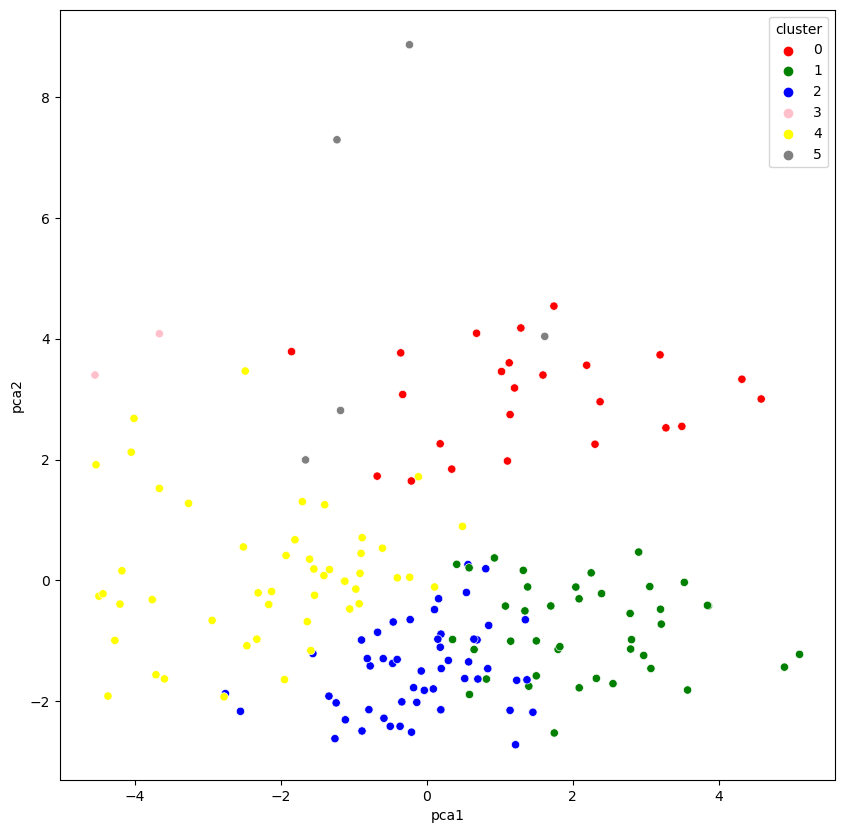

In [35]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray'])